# Search FORS2 galaxies in GALEX catalogs (MAST)

- author : Sylvie Dagoret-Campagne
- creation date : 2023-06-07
- last update : 2023-06-07


Be sure we have the latest version of GALEX/AIS



In [1]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
import astropy.coordinates as coordinates
from astropy.coordinates import angular_separation
#(lon1, lat1, lon2, lat2)
from astropy.coordinates import Angle
import astropy.units as u
import h5py
import pandas as pd
import numpy as np
import os
from astropy.io import fits
from astropy.table import Table

import astropy.units as u

In [2]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.simbad import Simbad

In [3]:
def GetColumnHfData(hff,list_of_keys,nameval):
    """
    Extract hff atttribute 
    
    parameters
      hff           : descriptor of h5 file
      list_of_keys : list of exposures
      nameval      : name of the attribute
      
    return
           the array of values in the order of 
    """
    

    all_data = []
    for key in list_of_keys:
        group=hff.get(key)
        val=group.attrs[nameval]
        all_data.append(val)
    return all_data


In [4]:
def ReadFors2h5FileAttributes(hf):
    hf =  h5py.File(input_file_h5, 'r') 
    list_of_keys = list(hf.keys())
    # pick one key    
    key_sel =  list_of_keys[0]
    # pick one group
    group = hf.get(key_sel)  
    #pickup all attribute names
    all_subgroup_keys = []
    for k in group.attrs.keys():
        all_subgroup_keys.append(k)
    # create info
    df_info = pd.DataFrame()
    for key in all_subgroup_keys:
        arr=GetColumnHfData(hf, list_of_keys ,key)
        df_info[key] = arr
    df_info.sort_values(by="num", ascending=True,inplace=True)
    df_info_num = df_info["num"].values
    key_tags = [ f"SPEC{num}" for num in df_info_num ]
    df_info["name"] = key_tags
    
    #'Nsp', 'RT', 'RV', 'Rmag', 'dec', 'eRV', 'lines', 'num', 'ra', 'redshift',
    
    df_info = df_info[['num' ,'name', 'ra', 'dec', 'Rmag','redshift','lines','RT','RV','eRV','Nsp']]
    return df_info
    

## MAST Catalogs

In [5]:
print(Observations.list_missions())

['IUE', 'FIMS-SPEAR', 'BEFS', 'HUT', 'GALEX', 'Kepler', 'KeplerFFI', 'HLA', 'PS1', 'HST', 'EUVE', 'TUES', 'TESS', 'K2FFI', 'K2', 'OPO', 'WUPPE', 'HLSP', 'JWST', 'SPITZER_SHA', 'FUSE', 'SWIFT']


### Target

In [6]:
target_name_simbad = "BAX 013.5117-28.3994"
target_name_ned = "RX J0054.0-2823"
result_table = Simbad.query_object(target_name_simbad)
ra_str = result_table['RA'][0] + ' hours'
dec_str = result_table['DEC'][0] + ' degree'
coord = coordinates.SkyCoord(ra_str,dec_str)
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (13.51166667, -28.39944444)>

In [7]:
catalog_data = Catalogs.query_object(target_name_simbad, catalog="Galex",data_release="DR6",radius=0.25)

In [8]:
df_galex = catalog_data.to_pandas()
df_galex.head()

,distance_arcmin,objID,survey,ra,dec,band,fov_radius,IAUName,nuv_exptime,fuv_exptime,...,dec_cent,xCenter,yCenter,SSAPFitsFile,nuv_flux_auto,nuv_flux_aper_7,nuv_artifact,fuv_flux_auto,fuv_flux_aper_7,fuv_artifact
0,1.007453,6380802579077530534,AIS,13.493582,-28.404687,1,0.296882,GALEX J005358.4-282416,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.267721,0.269305,0,NaN,NaN,0
1,1.157011,6380802579077530499,AIS,13.524429,-28.415100,1,0.316882,GALEX J005405.8-282454,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.145434,0.113484,0,NaN,NaN,0
2,1.285087,6380802579077530550,AIS,13.487534,-28.402020,1,0.292551,GALEX J005357.0-282407,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.087357,-0.059666,0,NaN,NaN,0
3,1.363585,6380802579077530502,AIS,13.492673,-28.414775,1,0.306084,GALEX J005358.2-282453,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.128366,0.129605,0,NaN,NaN,0
4,1.381515,6380802579077530542,AIS,13.537556,-28.402986,1,0.311018,GALEX J005409.0-282410,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.112704,0.040573,0,NaN,NaN,0


In [9]:
df_galex

,distance_arcmin,objID,survey,ra,dec,band,fov_radius,IAUName,nuv_exptime,fuv_exptime,...,dec_cent,xCenter,yCenter,SSAPFitsFile,nuv_flux_auto,nuv_flux_aper_7,nuv_artifact,fuv_flux_auto,fuv_flux_aper_7,fuv_artifact
0,1.007453,6380802579077530534,AIS,13.493582,-28.404687,1,0.296882,GALEX J005358.4-282416,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.267721,0.269305,0,NaN,NaN,0
1,1.157011,6380802579077530499,AIS,13.524429,-28.415100,1,0.316882,GALEX J005405.8-282454,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.145434,0.113484,0,NaN,NaN,0
2,1.285087,6380802579077530550,AIS,13.487534,-28.402020,1,0.292551,GALEX J005357.0-282407,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.087357,-0.059666,0,NaN,NaN,0
3,1.363585,6380802579077530502,AIS,13.492673,-28.414775,1,0.306084,GALEX J005358.2-282453,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.128366,0.129605,0,NaN,NaN,0
4,1.381515,6380802579077530542,AIS,13.537556,-28.402986,1,0.311018,GALEX J005409.0-282410,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.112704,0.040573,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,14.945602,6380802579077529743,AIS,13.548884,-28.646342,1,0.541666,GALEX J005411.7-283846,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.144649,0.135904,0,NaN,NaN,0
747,14.966794,6380802579077530668,AIS,13.792619,-28.365634,1,0.438181,GALEX J005510.2-282156,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.801107,0.715013,0,NaN,NaN,0
748,14.968822,6380802579079628707,AIS,13.416497,-28.164429,3,0.052202,GALEX J005339.9-280951,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.148957,0.087437,0,0.059999,0.087727,0
749,14.971663,6380802579077530507,AIS,13.795033,-28.411781,1,0.466592,GALEX J005510.8-282442,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.173570,0.176999,0,NaN,NaN,0


In [10]:
df_galex.rename(columns={"ra":"ra_galex","dec":"dec_galex"},inplace=True)

## Read FORS2 catalog

In [11]:
input_file_h5  = '../data/FORS2spectra.hdf5'

In [12]:
hf =  h5py.File(input_file_h5, 'r') 
list_of_keys = list(hf.keys())

In [13]:
df_info = ReadFors2h5FileAttributes(hf)

In [14]:
df_info = df_info[['num', 'ra', 'dec', 'Rmag','redshift']]

In [15]:
df_info.reset_index(drop=True, inplace=True) 

In [16]:
df_info

,num,ra,dec,Rmag,redshift
0,2,13.52997,-28.44776,21.18,0.34555
1,3,13.52552,-28.42080,21.45,0.68660
2,9,13.50219,-28.40641,21.60,0.29266
3,13,13.49261,-28.38272,23.14,0.68870
4,19,13.60758,-28.43452,21.70,0.48395
...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012
546,735,13.69958,-28.23161,19.28,0.36169
547,736,13.66431,-28.22849,21.64,0.55777
548,737,13.62722,-28.22692,21.40,0.52001


## Get FORS2 spectra

In [17]:
df_info_num = df_info["num"].values
key_tags = [ f"SPEC{num}" for num in df_info_num ]

In [18]:
all_df = []   
idx=0
for key in key_tags :
    group = hf.get(key)
    df = pd.DataFrame()
    df["wl"] = np.array(group.get("wl"))
    df["fl"] = np.array(group.get("fl")) 
    all_df.append(df)
    idx+=1

## GALEX catalog

### find central cluster coordinates

In [19]:
target_name_simbad = "BAX 013.5117-28.3994"
target_name_ned = "RX J0054.0-2823"

In [20]:
result_table = Simbad.query_object(target_name_simbad)

In [21]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
BAX 013.5117-28.3994,00 54 02.8,-28 23 58,5,5,--,--,0,D,,1998ApJ...502..558V,1


In [22]:
ra_str = result_table['RA'][0] + ' hours'
dec_str = result_table['DEC'][0] + ' degree'

In [23]:
coord = coordinates.SkyCoord(ra_str,dec_str)
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (13.51166667, -28.39944444)>

In [24]:
coord.ra.deg

13.511666666666665

In [25]:
coord.dec.deg

-28.399444444444445

In [26]:
result_ptable = df_galex
result_ptable.head()

,distance_arcmin,objID,survey,ra_galex,dec_galex,band,fov_radius,IAUName,nuv_exptime,fuv_exptime,...,dec_cent,xCenter,yCenter,SSAPFitsFile,nuv_flux_auto,nuv_flux_aper_7,nuv_artifact,fuv_flux_auto,fuv_flux_aper_7,fuv_artifact
0,1.007453,6380802579077530534,AIS,13.493582,-28.404687,1,0.296882,GALEX J005358.4-282416,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.267721,0.269305,0,NaN,NaN,0
1,1.157011,6380802579077530499,AIS,13.524429,-28.415100,1,0.316882,GALEX J005405.8-282454,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.145434,0.113484,0,NaN,NaN,0
2,1.285087,6380802579077530550,AIS,13.487534,-28.402020,1,0.292551,GALEX J005357.0-282407,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.087357,-0.059666,0,NaN,NaN,0
3,1.363585,6380802579077530502,AIS,13.492673,-28.414775,1,0.306084,GALEX J005358.2-282453,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.128366,0.129605,0,NaN,NaN,0
4,1.381515,6380802579077530542,AIS,13.537556,-28.402986,1,0.311018,GALEX J005409.0-282410,108.0,108.0,...,-28.12652,1953.991,1915.793,NaN,0.112704,0.040573,0,NaN,NaN,0


In [27]:
#for colname in result_ptable.columns:
#    print(colname)

In [28]:
N = len(result_ptable)

In [29]:
#all_ra = np.array([ Angle(result_table['RA'][idx] + ' hours').deg for idx in range(N) ])
#all_dec = np.array([ Angle(result_table['DEC'][idx] + ' degrees').deg for idx in range(N) ])

In [30]:
all_ra = np.array([result_ptable['ra_galex'].iloc[idx] for idx in range(N) ])
all_dec = np.array([result_ptable['dec_galex'].iloc[idx]  for idx in range(N) ])

In [31]:
catalog_galex = SkyCoord(all_ra*u.degree,all_dec*u.degree)

https://docs.astropy.org/en/stable/coordinates/matchsep.html#astropy-coordinates-matching

In [32]:
all_idx = []  # index of the match
all_d2d = []  # distance in arcsec
all_d3d = []

for index, row in df_info.iterrows():
    c = coordinates.SkyCoord(row['ra']*u.degree, row['dec']*u.degree)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog_galex)
    all_idx.append(int(idx))
    all_d2d.append(Angle(d2d[0]).arcsec)
    all_d3d.append(d3d)
    #print(idx,Angle(d2d[0]).arcsec,d3d)
    


In [33]:
all_idx = np.array(all_idx)

Text(0.5, 1.0, 'Angular separation FORS2-Galex')

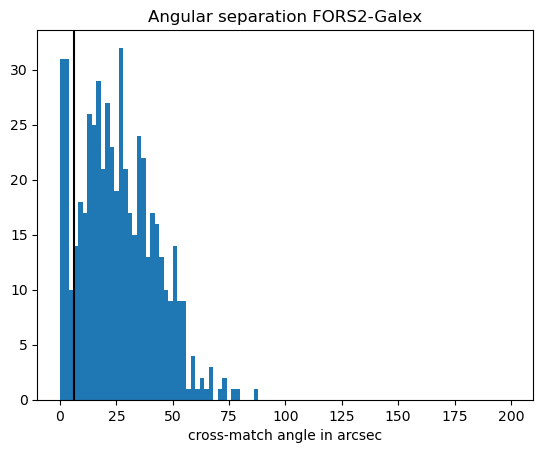

In [34]:
plt.hist(all_d2d,bins=100,range=(0,200));
plt.xlabel("cross-match angle in arcsec")
plt.axvline(6.0,color="k")
plt.title("Angular separation FORS2-Galex")

Text(0.5, 1.0, 'Angular separation FORS2-Galex')

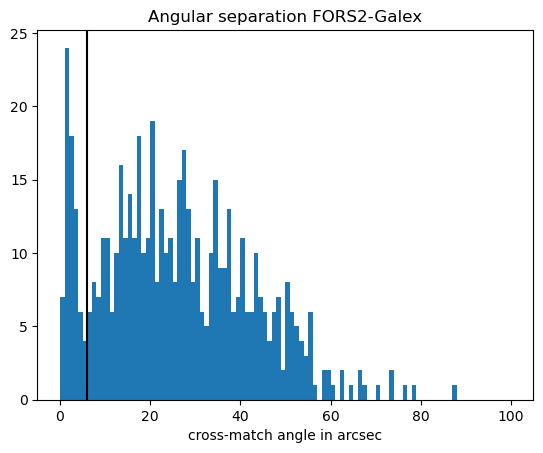

In [35]:
plt.hist(all_d2d,bins=100,range=(0,100));
plt.xlabel("cross-match angle in arcsec")
plt.axvline(6.0,color="k")
plt.title("Angular separation FORS2-Galex")

# Extract magnitudes

In [36]:
SelectedColumns = ["ra_galex","dec_galex","fuv_mag","nuv_mag","fuv_magerr","nuv_magerr","fuv_flux","nuv_flux","fuv_fluxerr","nuv_fluxerr" ]

In [37]:
result_ptable= result_ptable[SelectedColumns]

In [38]:
result_ptable

,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr
0,13.493582,-28.404687,NaN,21.510794,NaN,0.360429,NaN,9.029878,NaN,2.996898
1,13.524429,-28.415100,NaN,22.173336,NaN,0.472773,NaN,4.905293,NaN,2.135443
2,13.487534,-28.402020,NaN,22.726753,NaN,0.536845,NaN,2.946444,NaN,1.456522
3,13.492673,-28.414775,NaN,22.308874,NaN,0.455726,NaN,4.329625,NaN,1.816870
4,13.537556,-28.402986,NaN,22.450155,NaN,0.513862,NaN,3.801349,NaN,1.798681
...,...,...,...,...,...,...,...,...,...,...
746,13.548884,-28.646342,NaN,22.179209,NaN,0.441243,NaN,4.878832,NaN,1.982273
747,13.792619,-28.365634,NaN,20.320774,NaN,0.151703,NaN,27.020280,NaN,3.774442
748,13.416497,-28.164429,21.874632,22.147348,0.438981,0.442898,6.458761,5.024120,2.610748,2.048963
749,13.795033,-28.411781,NaN,21.981312,NaN,0.499045,NaN,5.854303,NaN,2.690204


## Create extended info dataframe

In [39]:
df_info_extended = pd.DataFrame(columns=SelectedColumns)

In [40]:
df_info_extended

,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr


In [41]:
N = len(df_info)
for index in range (N):
    index_galex_table = all_idx[index]
    df_info_extended.loc[index] = result_ptable.iloc[index_galex_table].values

In [42]:
df_info_extended

,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr
0,13.531423,-28.456012,20.422865,21.145170,0.252426,0.255224,24.595520,12.645368,5.716900,2.971828
1,13.524429,-28.415100,NaN,22.173336,NaN,0.472773,NaN,4.905293,NaN,2.135443
2,13.493582,-28.404687,NaN,21.510794,NaN,0.360429,NaN,9.029878,NaN,2.996898
3,13.488292,-28.374033,NaN,22.629692,NaN,0.543497,NaN,3.221977,NaN,1.612464
4,13.602319,-28.443209,NaN,21.152737,NaN,0.287115,NaN,12.557550,NaN,3.319950
...,...,...,...,...,...,...,...,...,...,...
545,13.672907,-28.231896,19.537182,16.488522,0.154001,0.022848,55.606922,921.703300,7.885356,19.391645
546,13.687228,-28.226752,20.512026,20.175917,0.277843,0.297318,22.656444,30.876852,5.796451,8.453250
547,13.672907,-28.231896,19.537182,16.488522,0.154001,0.022848,55.606922,921.703300,7.885356,19.391645
548,13.628613,-28.230257,21.295267,21.704386,0.383258,0.396922,11.012729,7.555190,3.886483,2.761346


In [43]:
df_info_extended["angularsep"] = all_d2d

## concatenate the pandas dataframe

- be carefull to have the indexes increasing from to to N (otherwise the merging is done on pandas dataframe index number)

In [44]:
df_info_concatenated = pd.concat([df_info, df_info_extended], axis=1)

In [45]:
df_info_concatenated

,num,ra,dec,Rmag,redshift,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr,angularsep
0,2,13.52997,-28.44776,21.18,0.34555,13.531423,-28.456012,20.422865,21.145170,0.252426,0.255224,24.595520,12.645368,5.716900,2.971828,30.060347
1,3,13.52552,-28.42080,21.45,0.68660,13.524429,-28.415100,NaN,22.173336,NaN,0.472773,NaN,4.905293,NaN,2.135443,20.808473
2,9,13.50219,-28.40641,21.60,0.29266,13.493582,-28.404687,NaN,21.510794,NaN,0.360429,NaN,9.029878,NaN,2.996898,27.954317
3,13,13.49261,-28.38272,23.14,0.68870,13.488292,-28.374033,NaN,22.629692,NaN,0.543497,NaN,3.221977,NaN,1.612464,34.131891
4,19,13.60758,-28.43452,21.70,0.48395,13.602319,-28.443209,NaN,21.152737,NaN,0.287115,NaN,12.557550,NaN,3.319950,35.437832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012,13.672907,-28.231896,19.537182,16.488522,0.154001,0.022848,55.606922,921.703300,7.885356,19.391645,25.387088
546,735,13.69958,-28.23161,19.28,0.36169,13.687228,-28.226752,20.512026,20.175917,0.277843,0.297318,22.656444,30.876852,5.796451,8.453250,42.903491
547,736,13.66431,-28.22849,21.64,0.55777,13.672907,-28.231896,19.537182,16.488522,0.154001,0.022848,55.606922,921.703300,7.885356,19.391645,29.898930
548,737,13.62722,-28.22692,21.40,0.52001,13.628613,-28.230257,21.295267,21.704386,0.383258,0.396922,11.012729,7.555190,3.886483,2.761346,12.801767


## Save file

In [46]:
outputfile = "info_fors2GALEX_frommast_crossmatch.csv"

In [47]:
df_info_concatenated.to_csv(outputfile)

# Selected

In [48]:
df_info_selected = df_info_concatenated[df_info_concatenated["angularsep"]<6.0]

In [49]:
df_info_selected

,num,ra,dec,Rmag,redshift,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr,angularsep
13,36,13.56870,-28.43129,19.96,0.82266,13.568381,-28.431563,NaN,21.742678,NaN,0.471280,NaN,7.293375,NaN,3.165029,1.409596
35,80,13.49205,-28.40422,21.95,0.62787,13.493582,-28.404687,NaN,21.510794,NaN,0.360429,NaN,9.029878,NaN,2.996898,5.134442
38,85,13.53755,-28.38375,23.21,0.97900,13.538054,-28.383455,21.637587,NaN,0.460562,NaN,8.034657,NaN,3.407417,NaN,1.918868
44,96,13.48804,-28.40045,23.27,0.77410,13.487534,-28.402020,NaN,22.726753,NaN,0.536845,NaN,2.946444,NaN,1.456522,5.874876
70,151,13.54459,-28.38795,22.23,0.49762,13.544825,-28.388740,NaN,22.456930,NaN,0.484573,NaN,3.777699,NaN,1.685610,2.939464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,722,13.69932,-28.26123,20.99,1.21050,13.699529,-28.261452,NaN,21.741745,NaN,0.357171,NaN,7.299647,NaN,2.400757,1.038797
535,724,13.66411,-28.25705,21.07,0.23168,13.664060,-28.257300,NaN,22.904402,NaN,0.763259,NaN,2.501721,NaN,1.758252,0.912409
536,725,13.69168,-28.25586,20.86,0.23010,13.692175,-28.256077,NaN,22.222341,NaN,0.489375,NaN,4.688816,NaN,2.112883,1.754712
538,727,13.69381,-28.25005,22.59,0.23060,13.694120,-28.250854,NaN,22.122770,NaN,0.533234,NaN,5.139153,NaN,2.523361,3.057769


# View catalog in degree

In [50]:
df_info

,num,ra,dec,Rmag,redshift
0,2,13.52997,-28.44776,21.18,0.34555
1,3,13.52552,-28.42080,21.45,0.68660
2,9,13.50219,-28.40641,21.60,0.29266
3,13,13.49261,-28.38272,23.14,0.68870
4,19,13.60758,-28.43452,21.70,0.48395
...,...,...,...,...,...
545,734,13.68083,-28.23290,0.00,0.23012
546,735,13.69958,-28.23161,19.28,0.36169
547,736,13.66431,-28.22849,21.64,0.55777
548,737,13.62722,-28.22692,21.40,0.52001


In [51]:
df_f2 =df_info[df_info.Rmag>0]
siz_f2 =  20*(24 - df_f2.Rmag)

/Users/dagoret/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'FORS2')

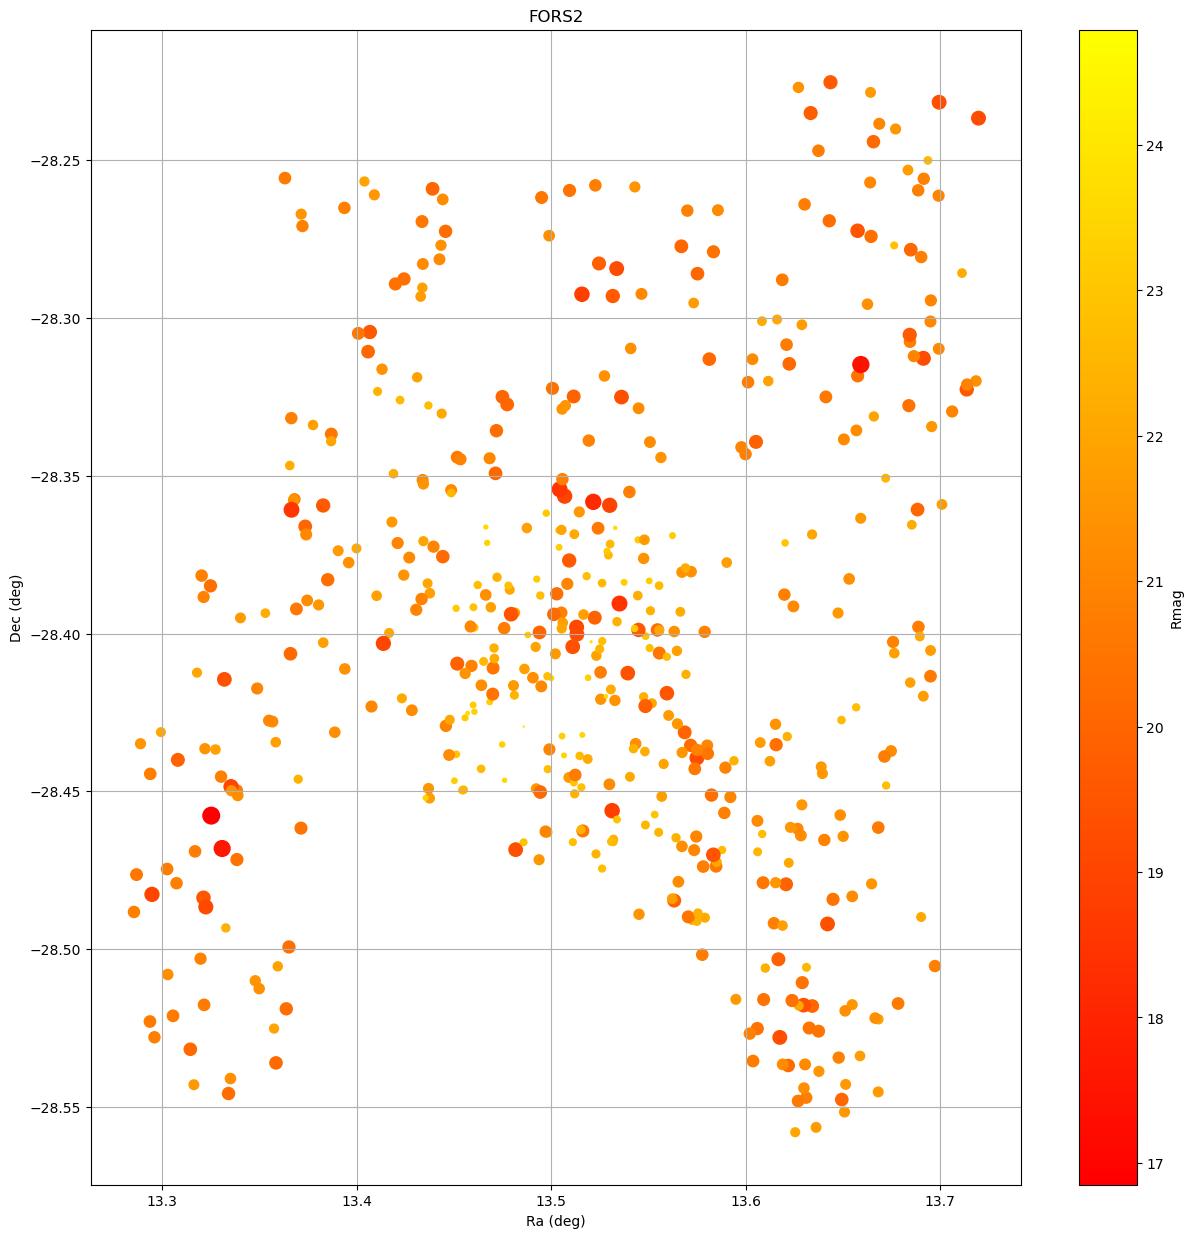

In [52]:
fig =plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)
im = ax.scatter(df_f2.ra, df_f2.dec,c=df_f2.Rmag,cmap="autumn",s=siz_f2)
cbar = plt.colorbar(im)
cbar.set_label('Rmag')
ax.grid()
ax.set_xlabel("Ra (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_title("FORS2")

In [53]:
result_ptable.head()

,ra_galex,dec_galex,fuv_mag,nuv_mag,fuv_magerr,nuv_magerr,fuv_flux,nuv_flux,fuv_fluxerr,nuv_fluxerr
0,13.493582,-28.404687,NaN,21.510794,NaN,0.360429,NaN,9.029878,NaN,2.996898
1,13.524429,-28.415100,NaN,22.173336,NaN,0.472773,NaN,4.905293,NaN,2.135443
2,13.487534,-28.402020,NaN,22.726753,NaN,0.536845,NaN,2.946444,NaN,1.456522
3,13.492673,-28.414775,NaN,22.308874,NaN,0.455726,NaN,4.329625,NaN,1.816870
4,13.537556,-28.402986,NaN,22.450155,NaN,0.513862,NaN,3.801349,NaN,1.798681


In [54]:
df_gnuv = result_ptable[["ra_galex","dec_galex","nuv_mag"]]
df_gfuv = result_ptable[["ra_galex","dec_galex","fuv_mag"]]

In [55]:
df_gnuv = df_gnuv[df_gnuv.nuv_mag>0] 
df_gfuv = df_gfuv[df_gfuv.fuv_mag>0] 

In [56]:
siz_gnuv =  20*(24 - df_gnuv["nuv_mag"]).values
df_gnuv.head() 

,ra_galex,dec_galex,nuv_mag
0,13.493582,-28.404687,21.510794
1,13.524429,-28.415100,22.173336
2,13.487534,-28.402020,22.726753
3,13.492673,-28.414775,22.308874
4,13.537556,-28.402986,22.450155


In [57]:
siz_gfuv =  20*(24- df_gfuv["fuv_mag"])
df_gfuv.head() 

,ra_galex,dec_galex,fuv_mag
6,13.538054,-28.383455,21.637587
14,13.544915,-28.378274,19.753520
23,13.560663,-28.394490,20.019392
34,13.446752,-28.394655,19.545553
39,13.531423,-28.456012,20.422865


/Users/dagoret/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


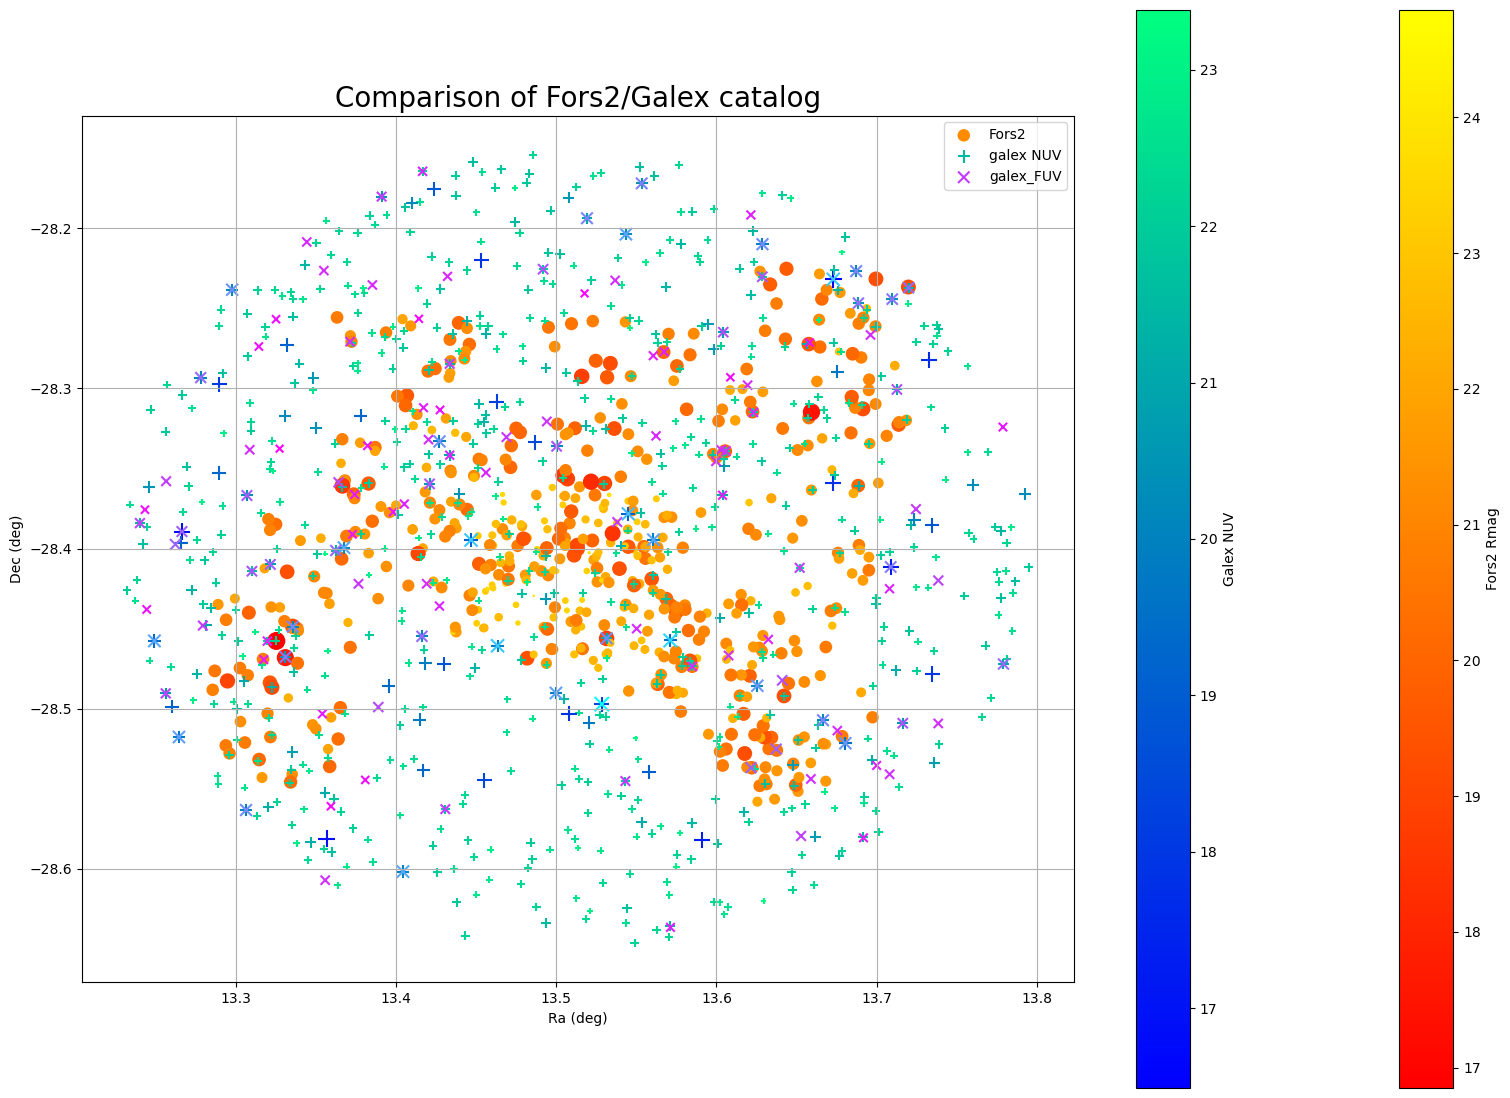

In [58]:
fig =plt.figure(figsize=(20,14))
ax=fig.add_subplot(111)
im = ax.scatter(df_f2.ra, df_f2.dec,c=df_f2.Rmag,cmap="autumn",s=siz_f2,label="Fors2")
imgnuv = ax.scatter(df_gnuv.ra_galex, df_gnuv.dec_galex,c=df_gnuv["nuv_mag"],marker="+",cmap="winter",s=siz_gnuv ,label="galex NUV")
imgfuv = ax.scatter(df_gfuv.ra_galex, df_gfuv.dec_galex,c=df_gfuv["fuv_mag"],marker ="x", cmap="cool",s=siz_gfuv,label="galex_FUV" )
cbar = plt.colorbar(im)
cbar.set_label('Fors2 Rmag')
cbar2 = plt.colorbar(imgnuv)
cbar2.set_label('Galex NUV')
ax.grid()
ax.legend()
ax.set_xlabel("Ra (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_title("Comparison of Fors2/Galex catalog",fontsize=20)

for idx,row in df_f2.iterrows():
    x = row["ra"]
    y = row["dec"]
    num = int(row["num"])
    dy = 0
    dx = 0
            
    #ax.text(x+dx,y+dy,str(num),fontsize=5)


plt.gca().set_aspect('equal')

In [59]:
ra_slices = [13.2,13.3,13.4,13.5,13.6,13.7,13.8]
dec_slices = [-28.6,-28.5,-28.4,-28.3,-28.2]

NRA = len(ra_slices)-1
NDEC = len(dec_slices)-1

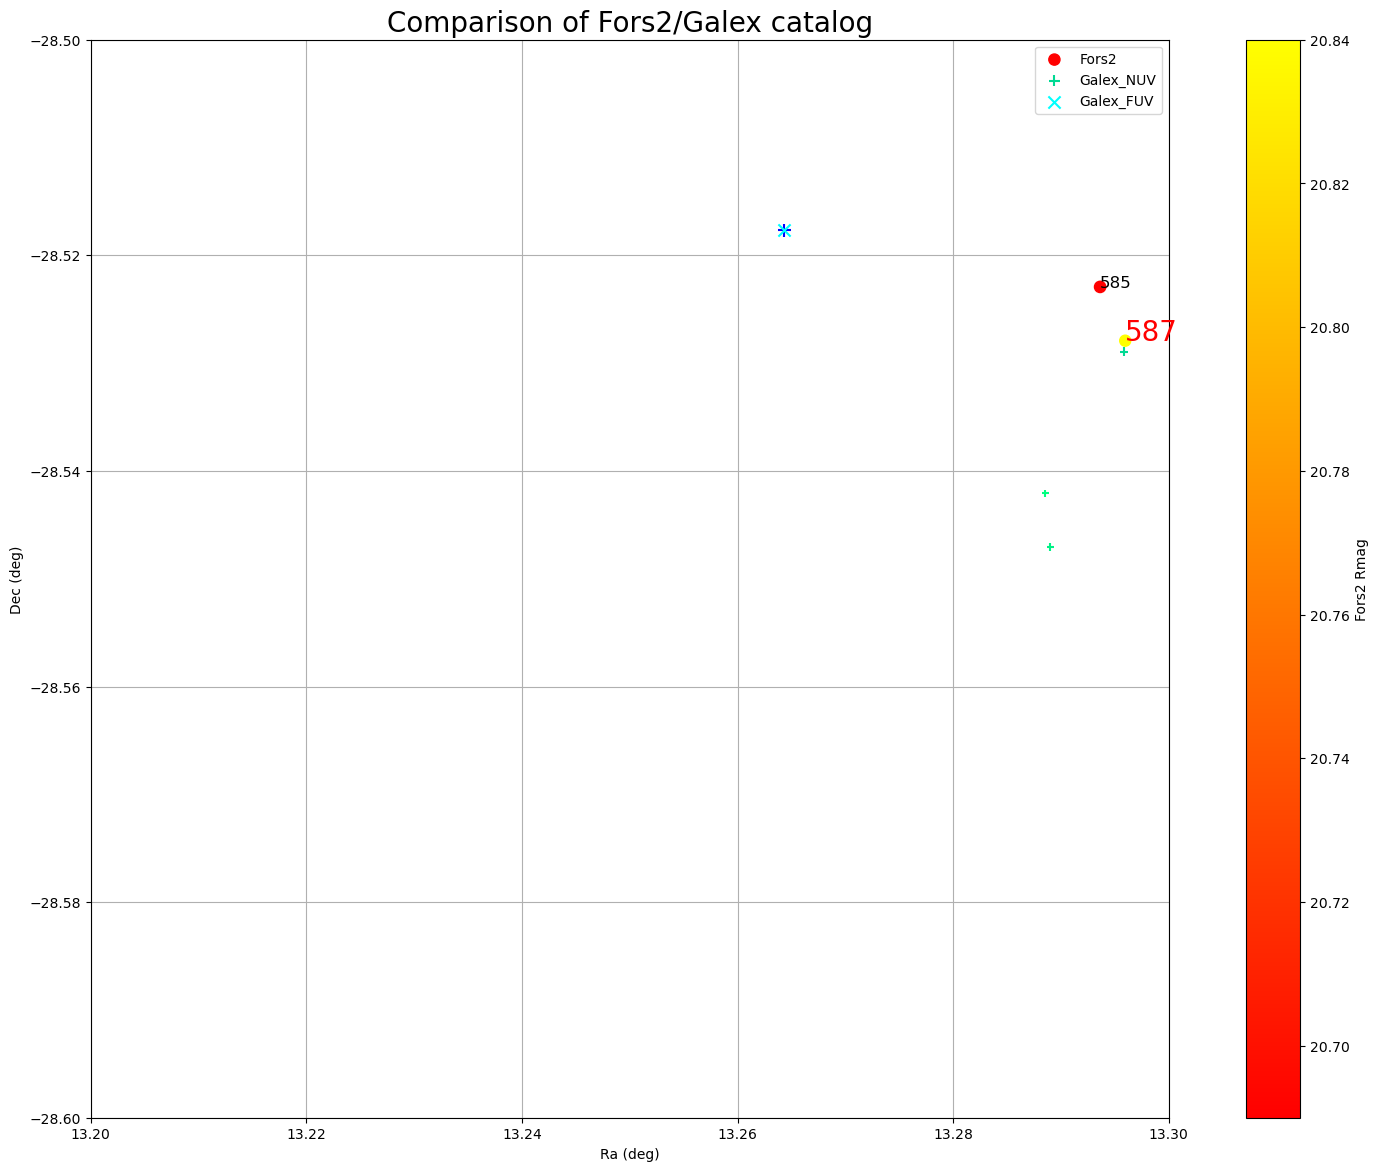

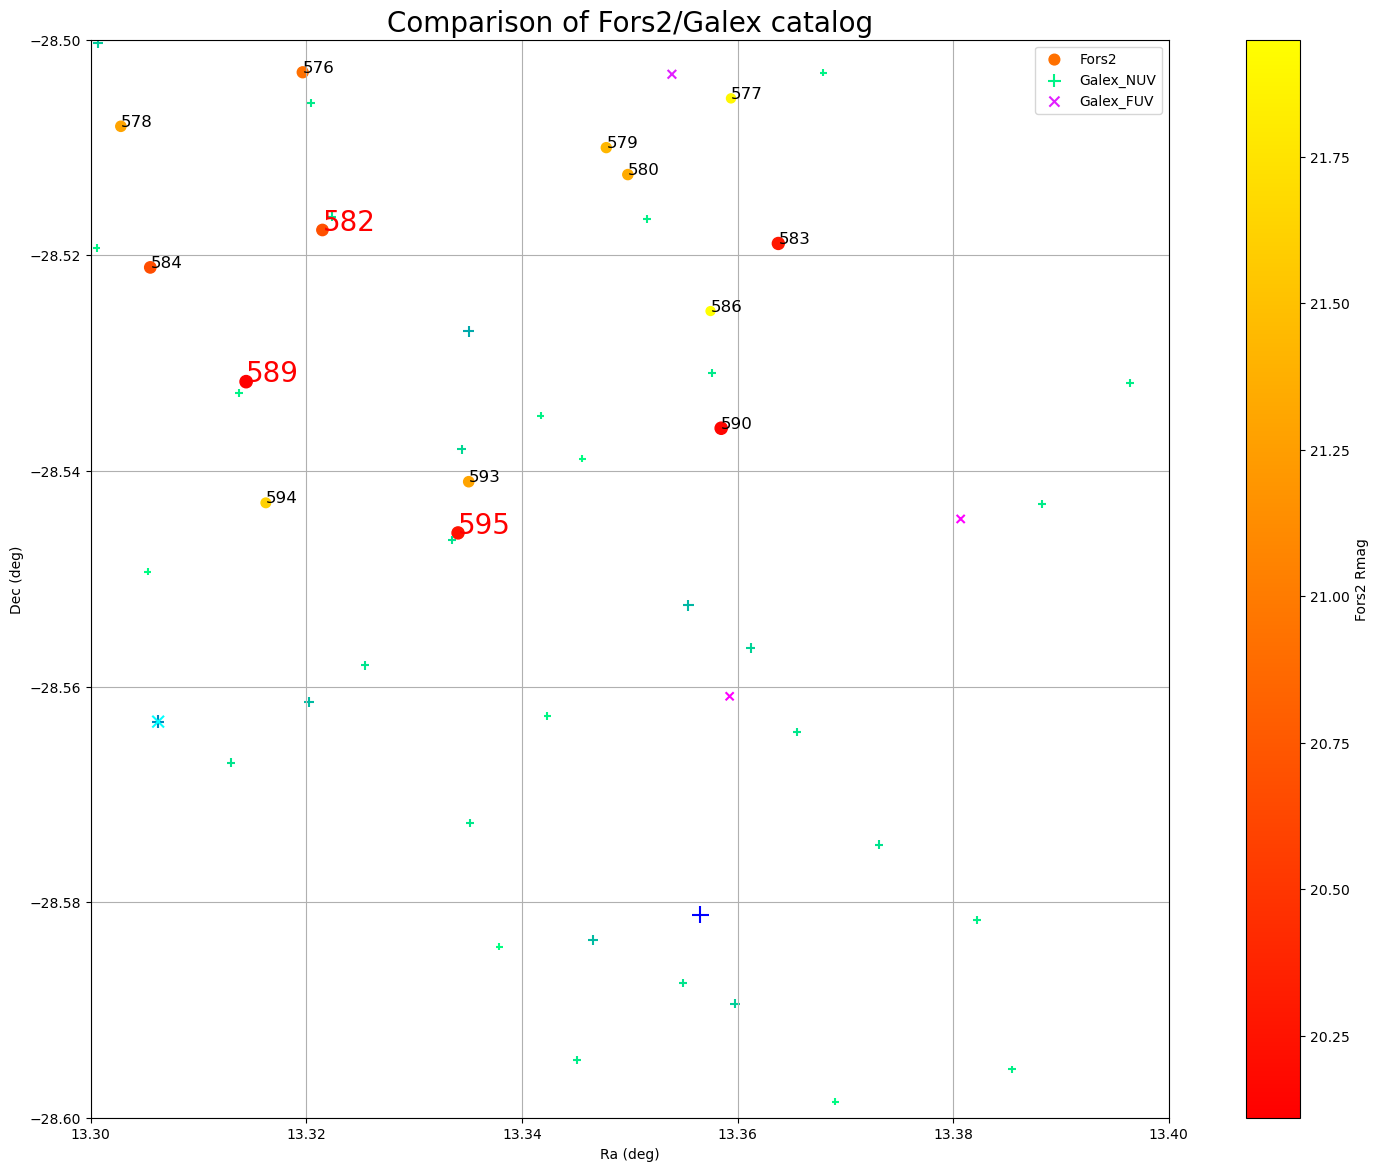

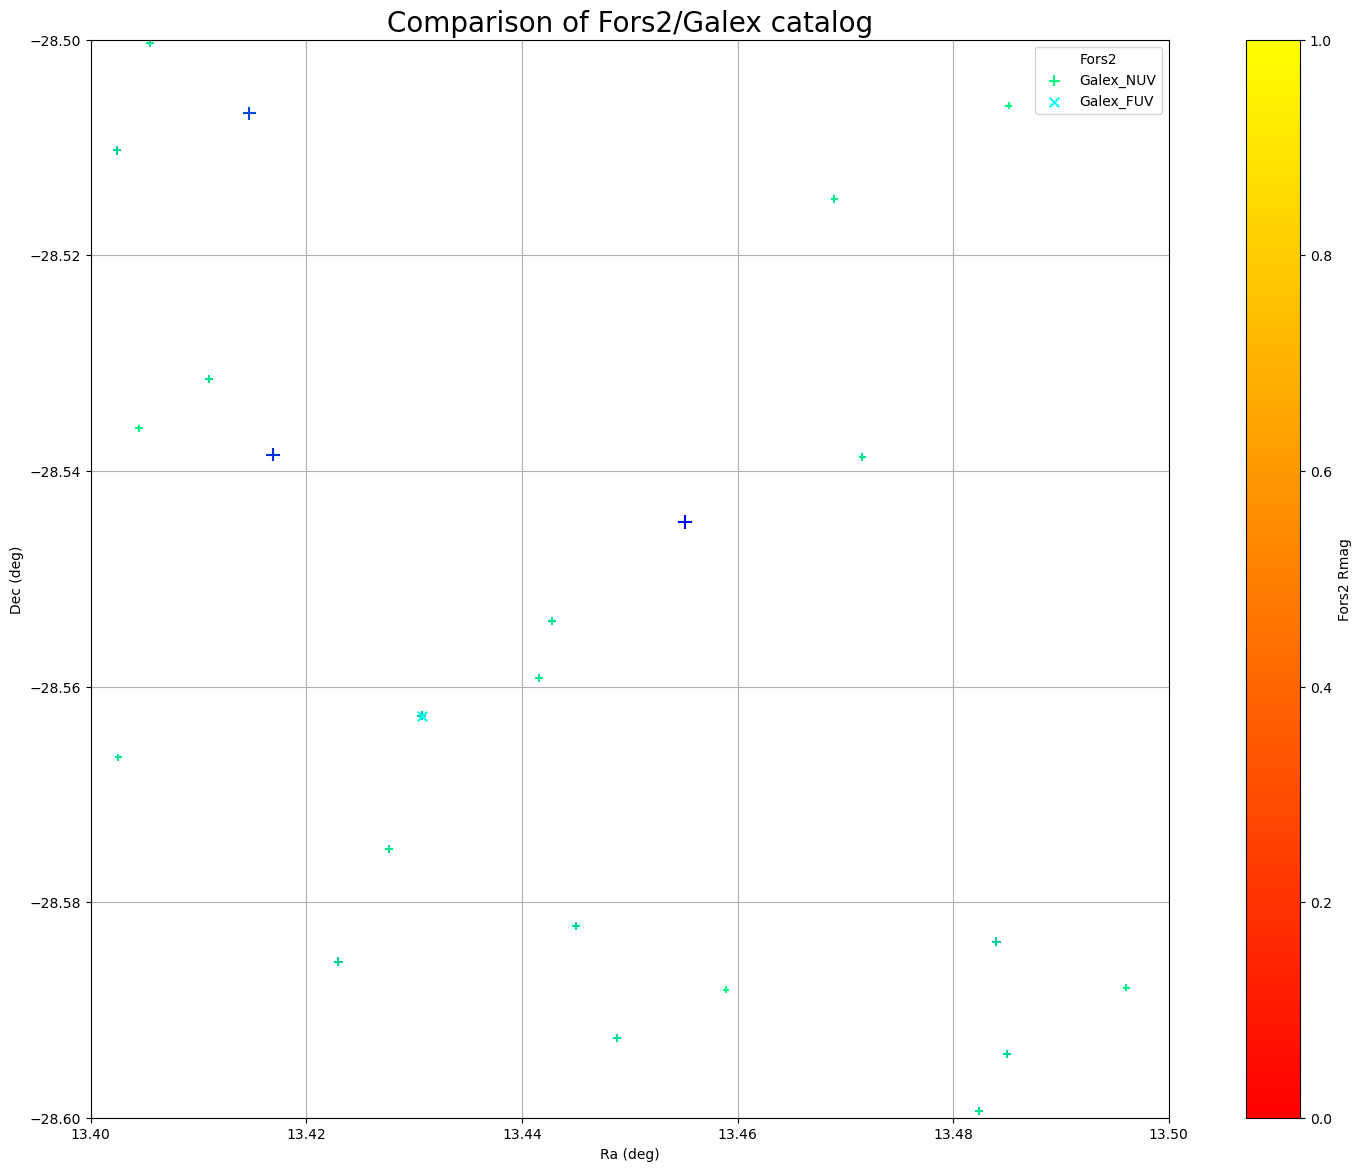

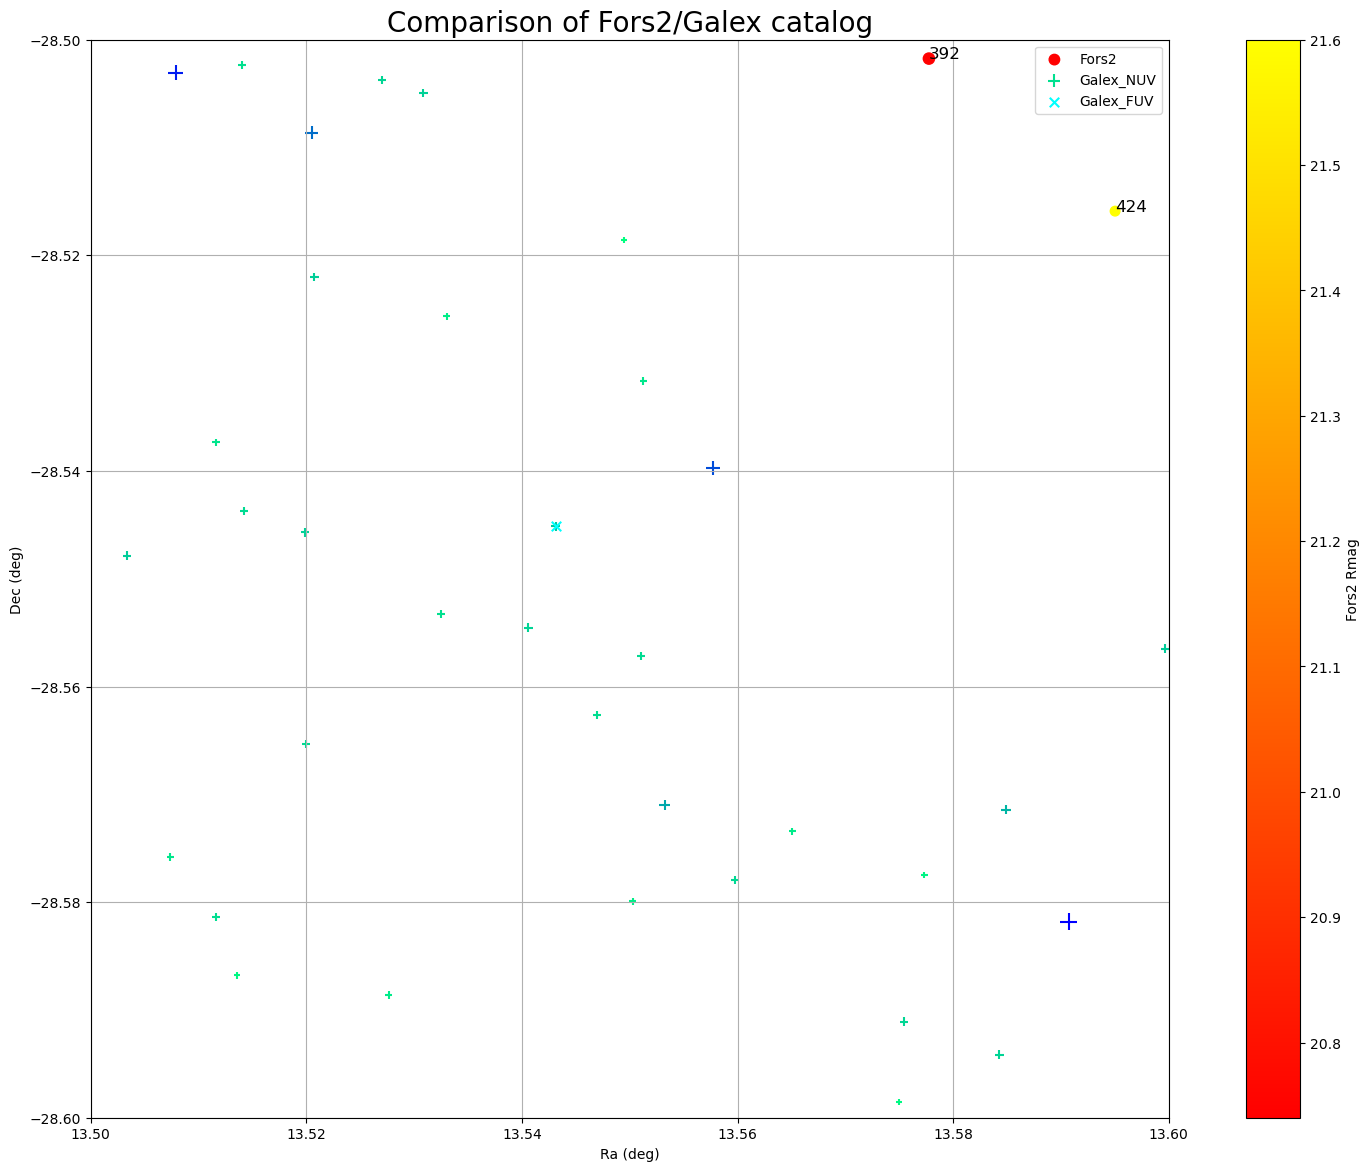

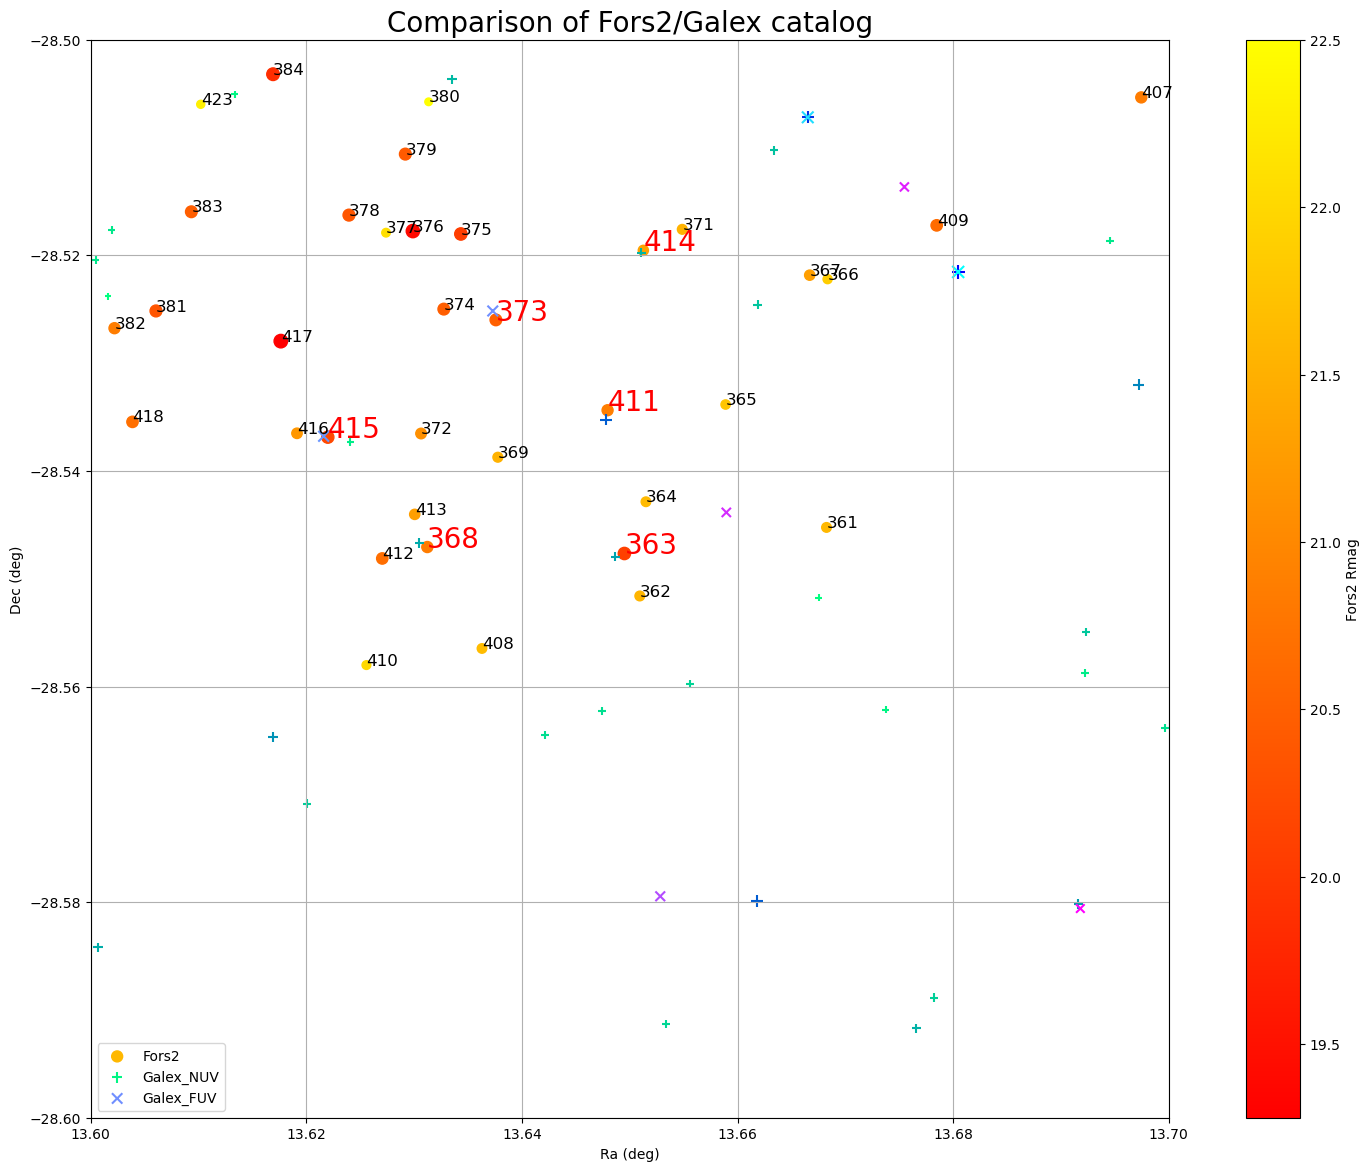

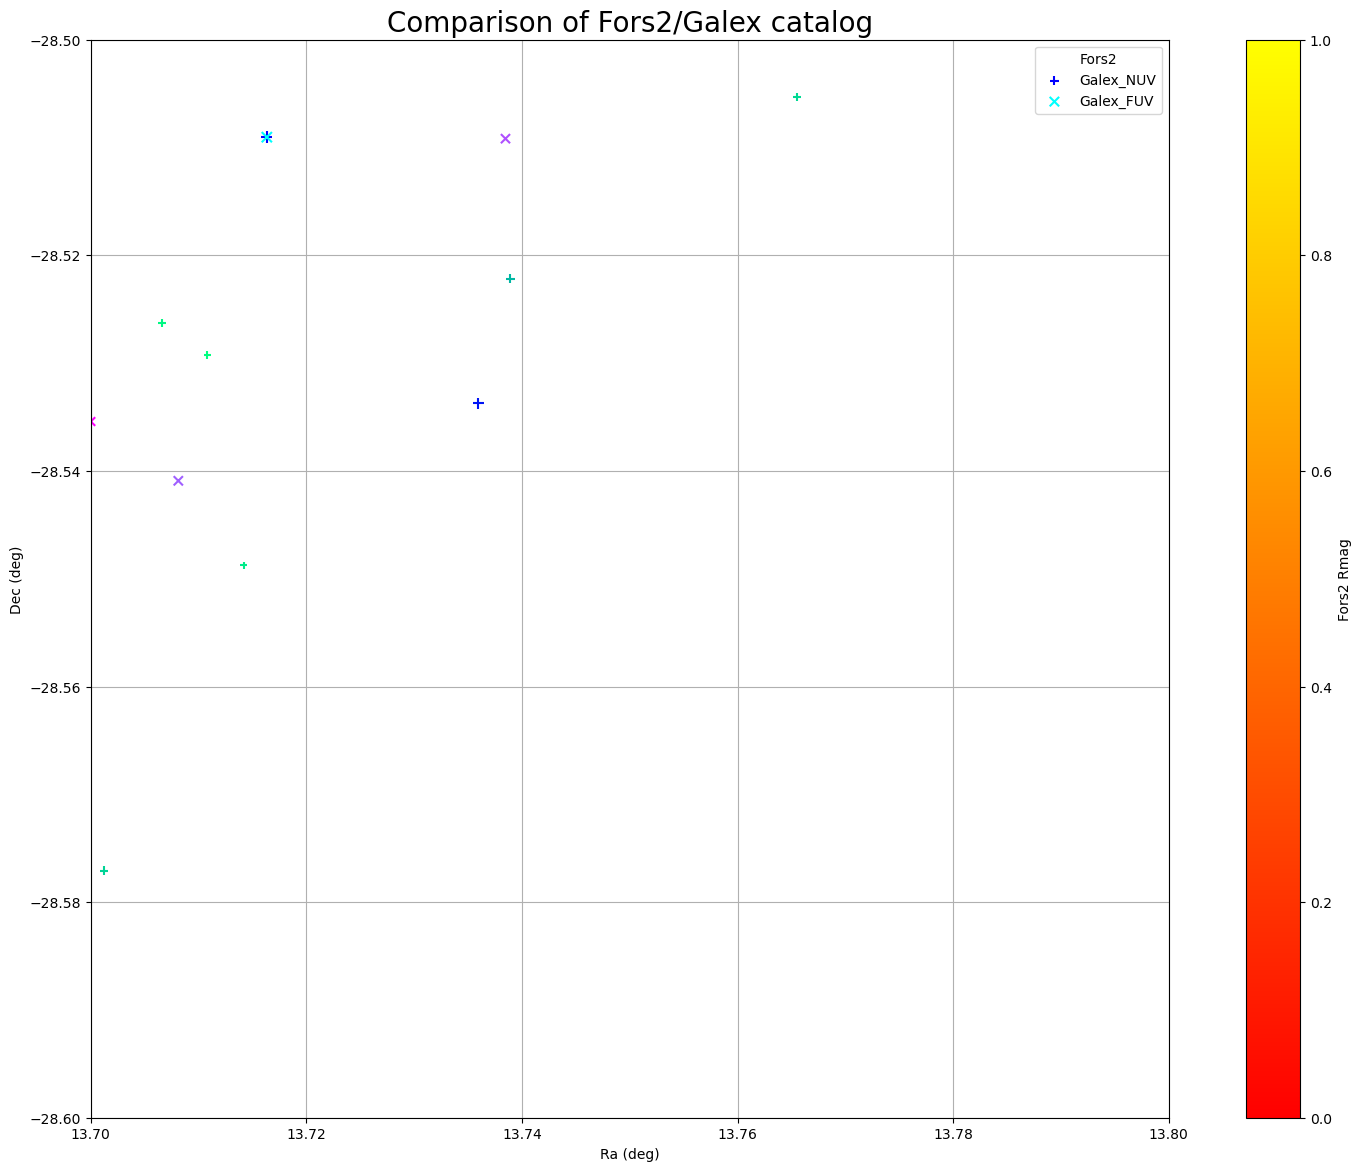

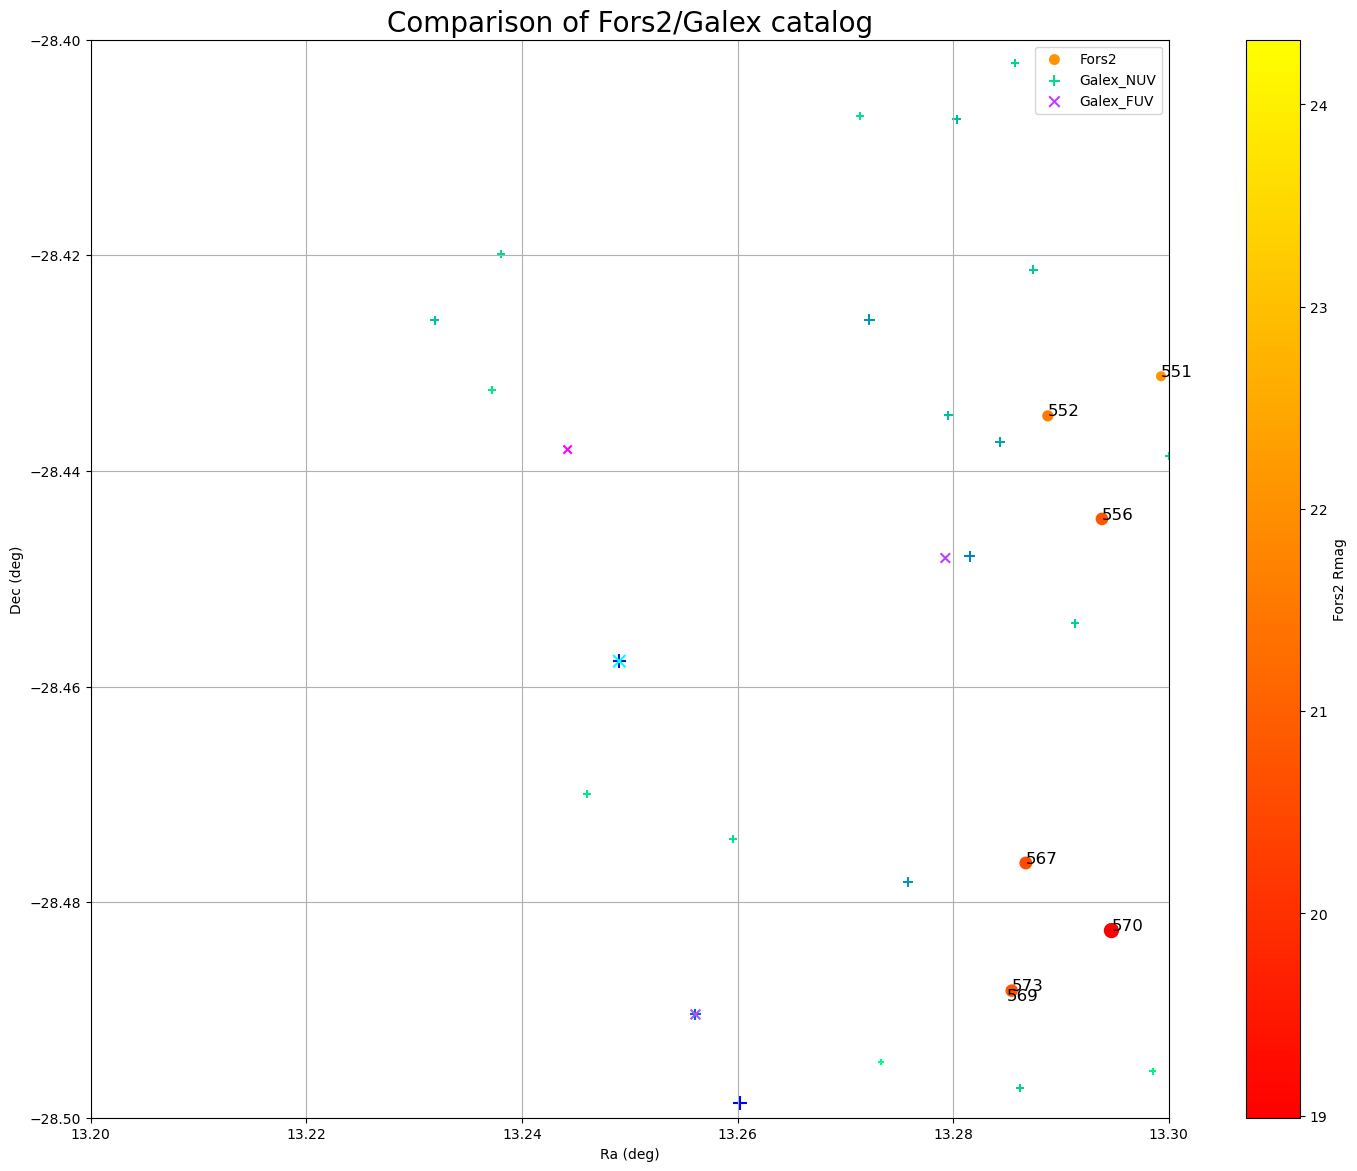

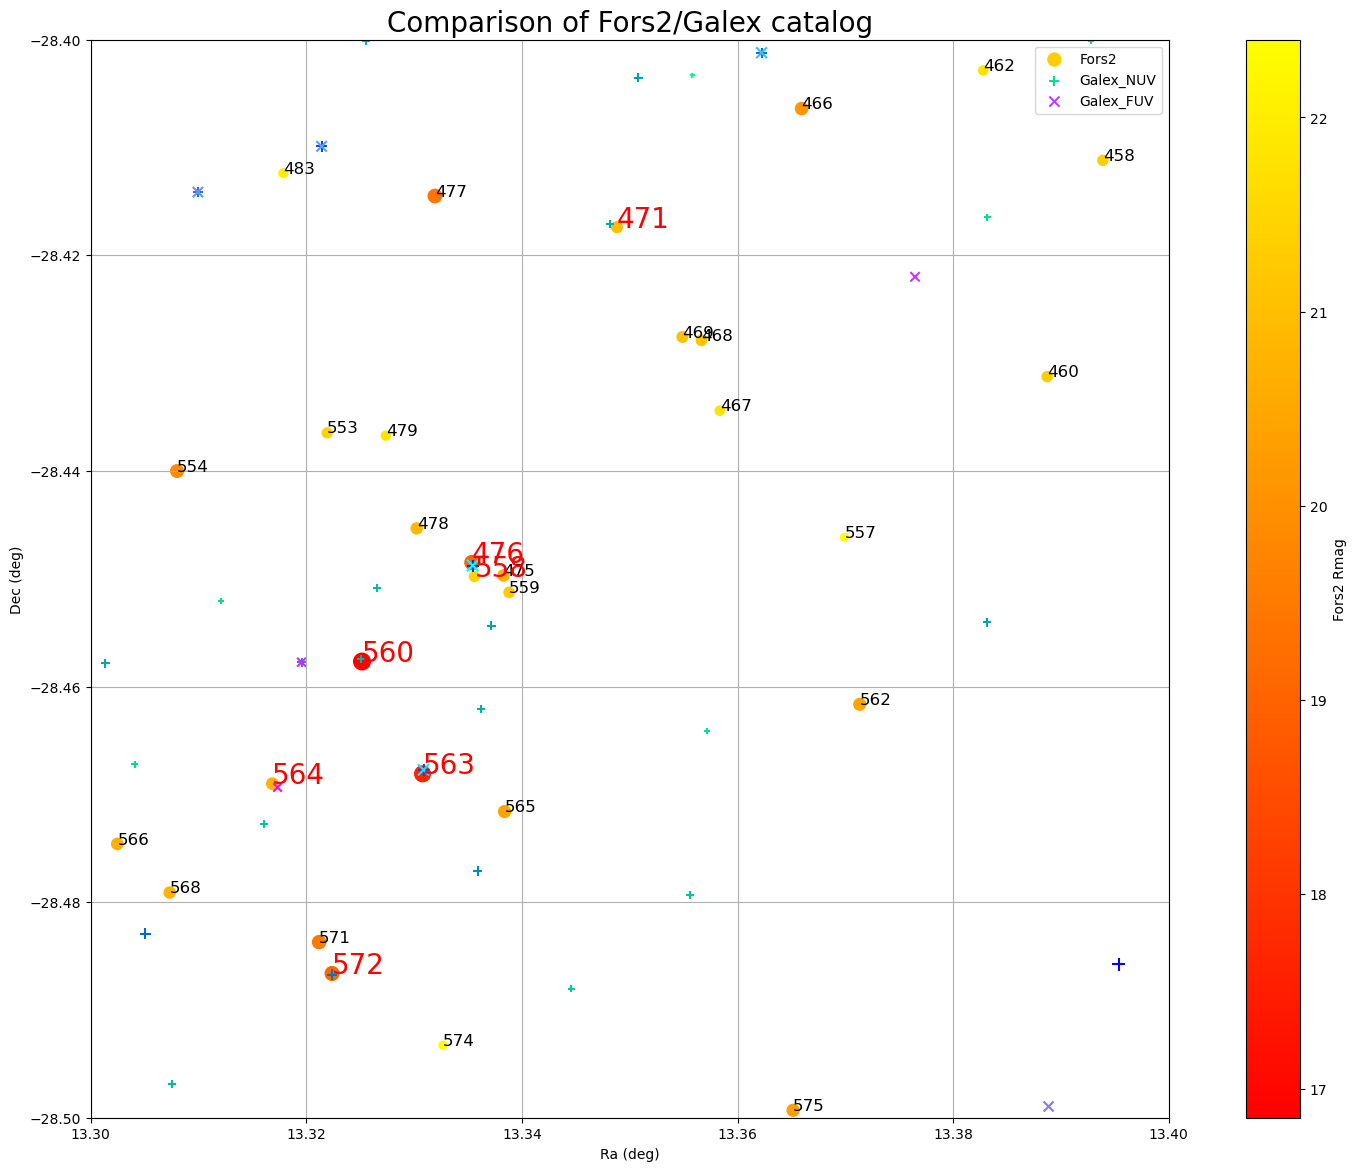

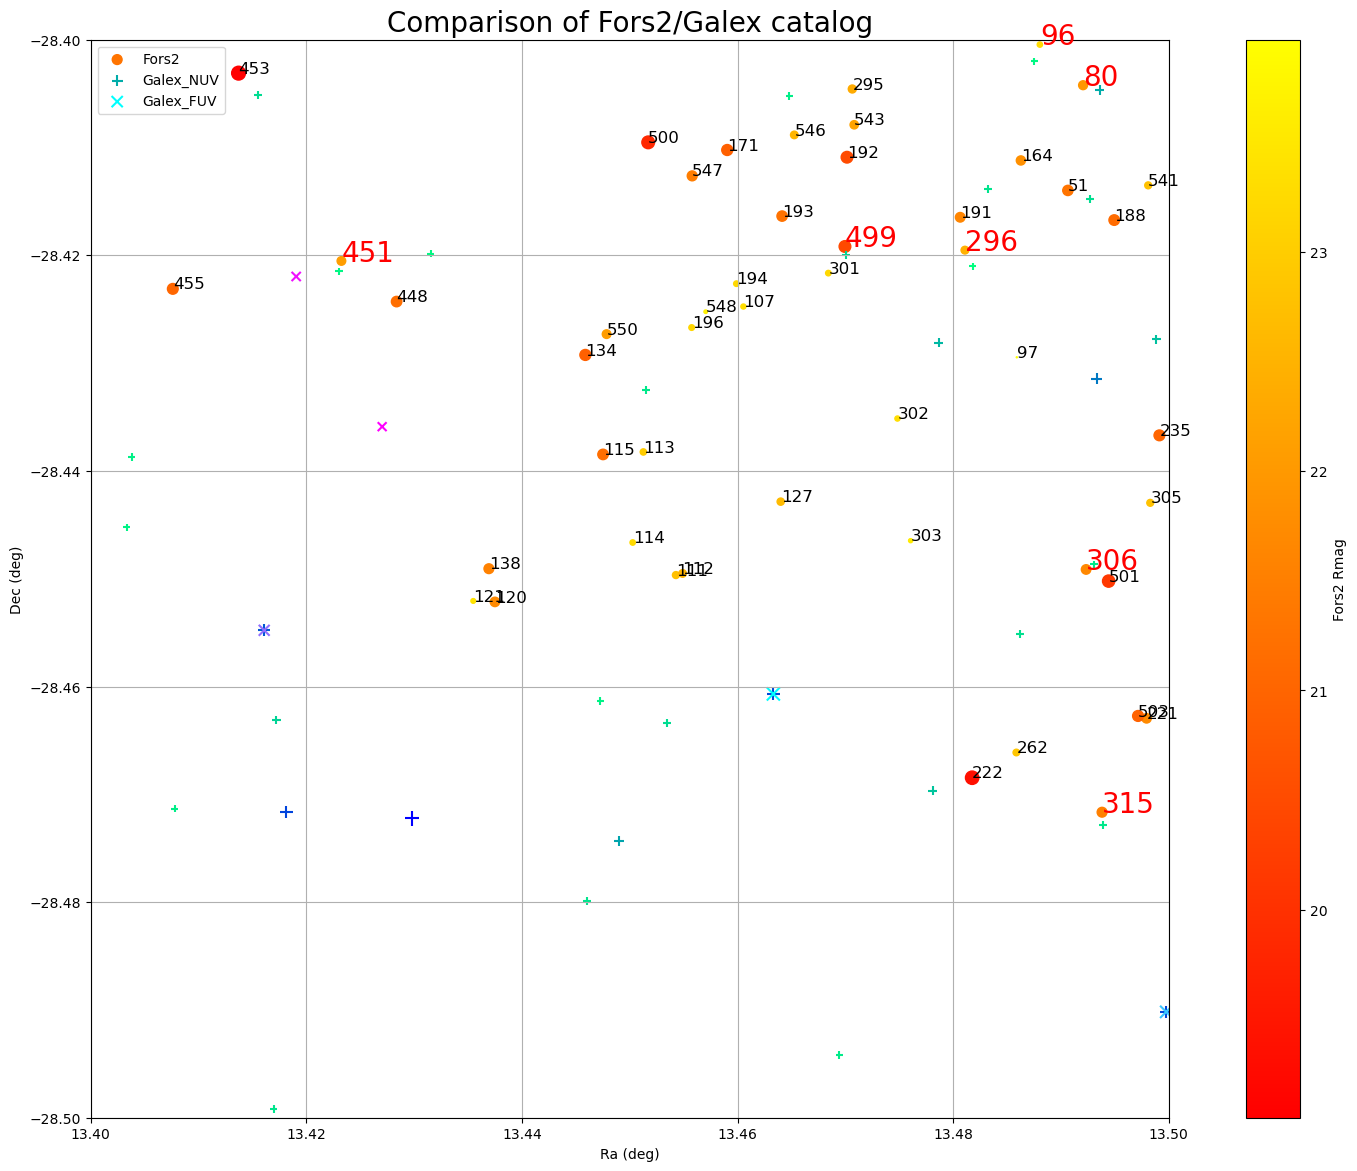

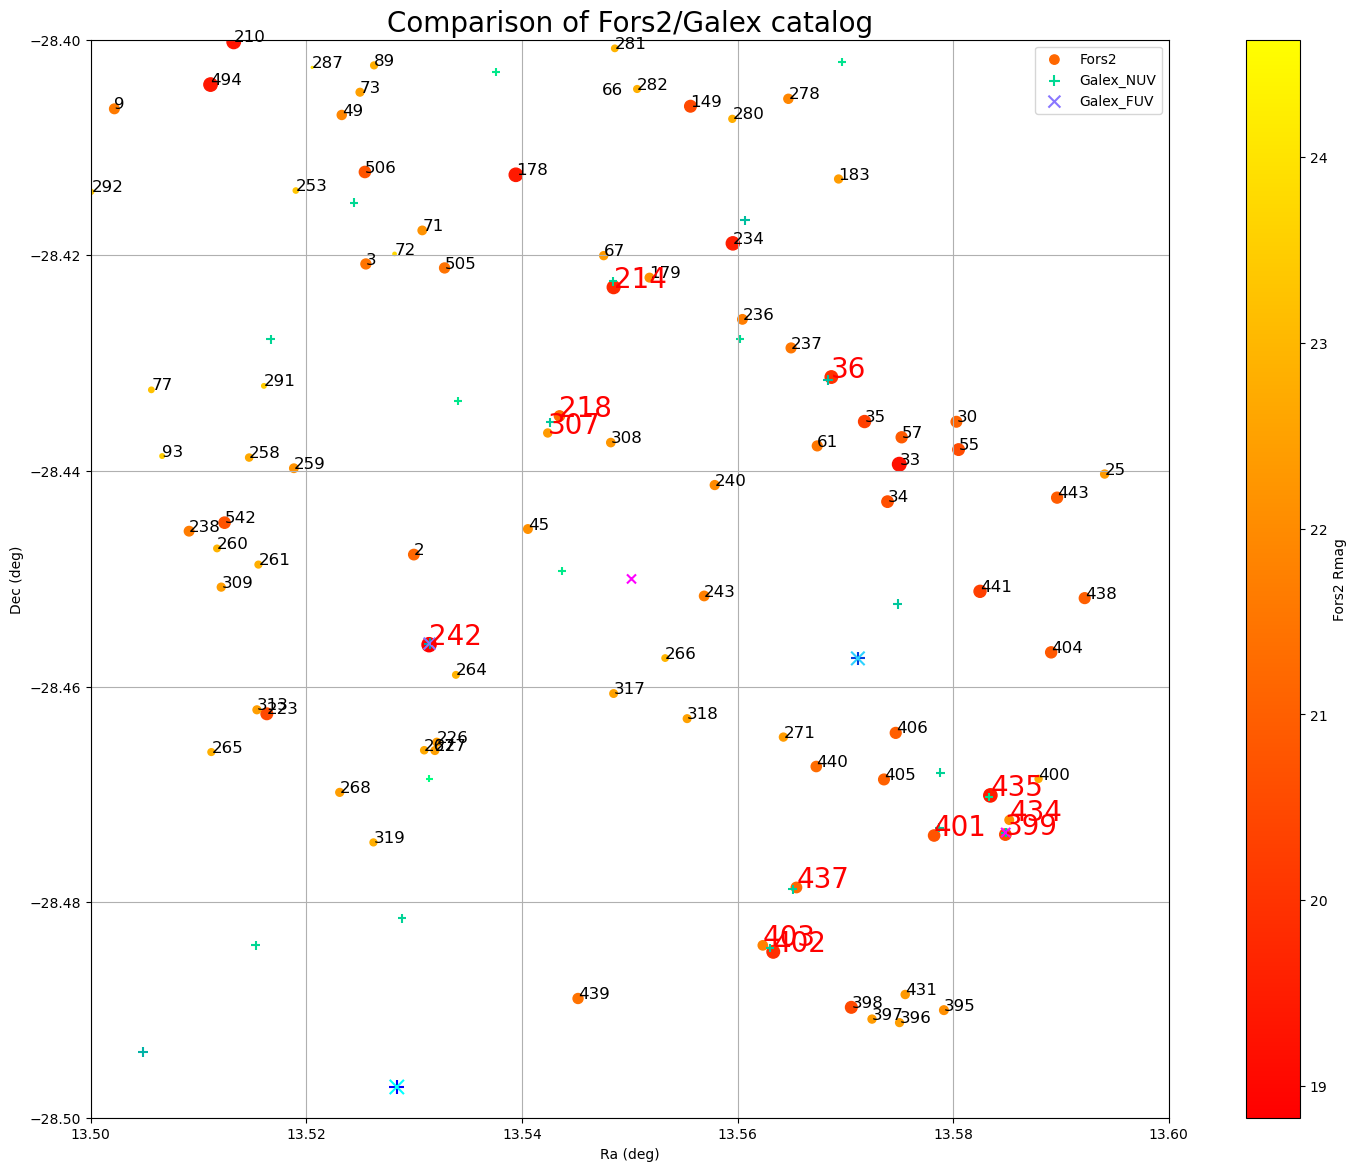

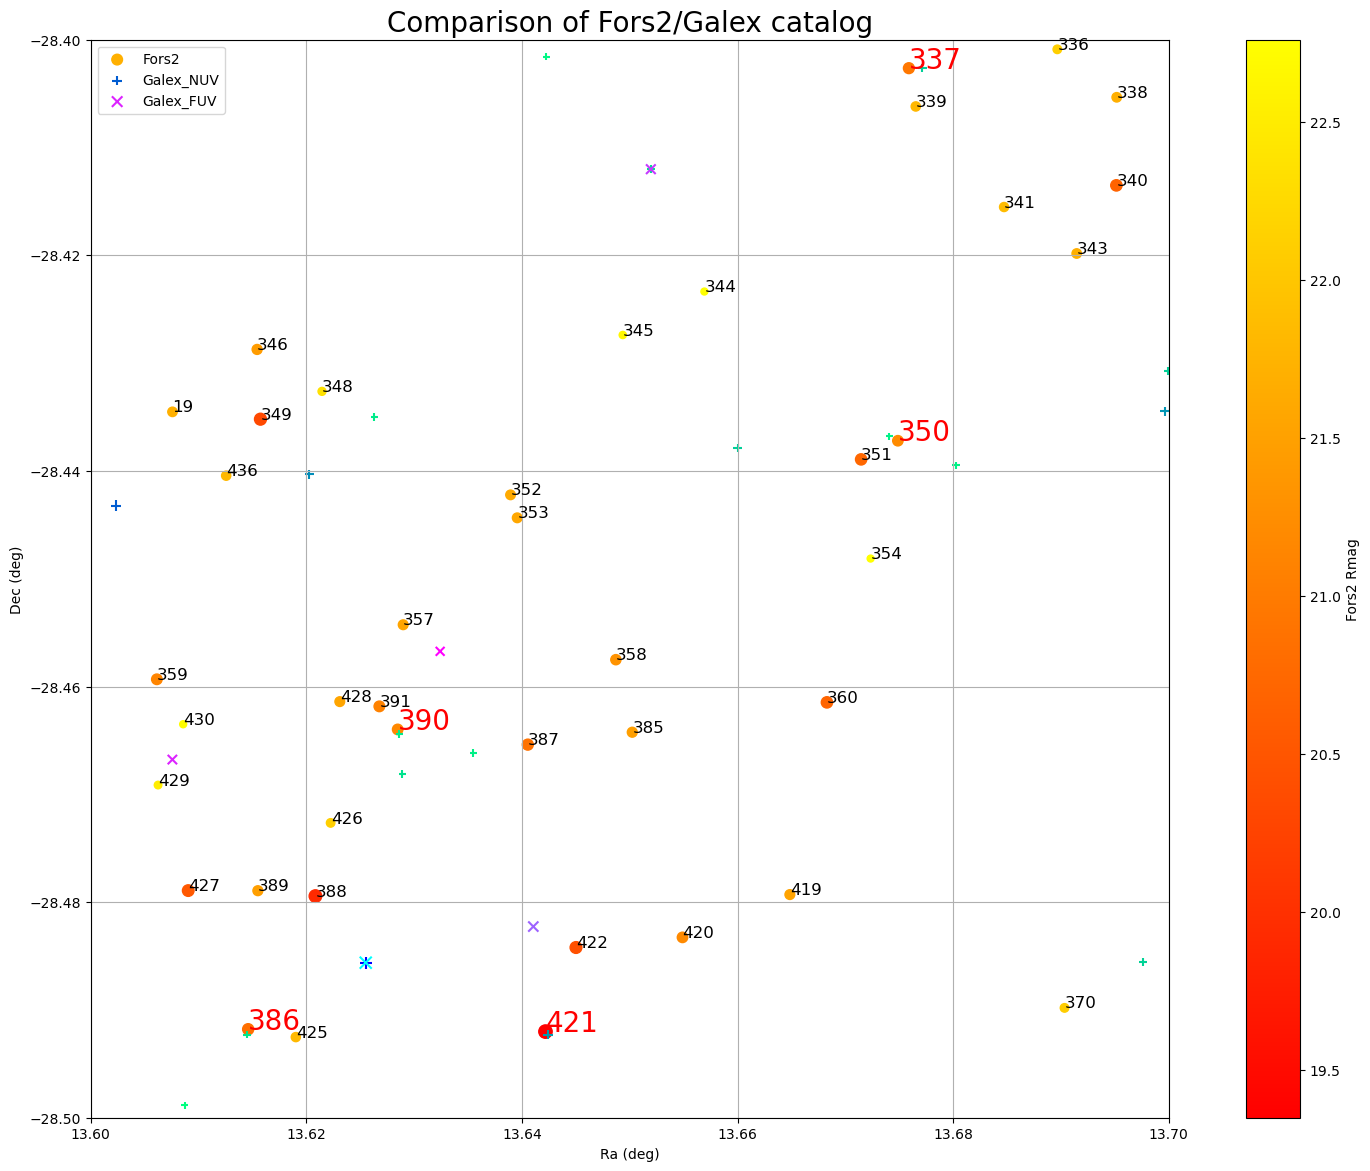

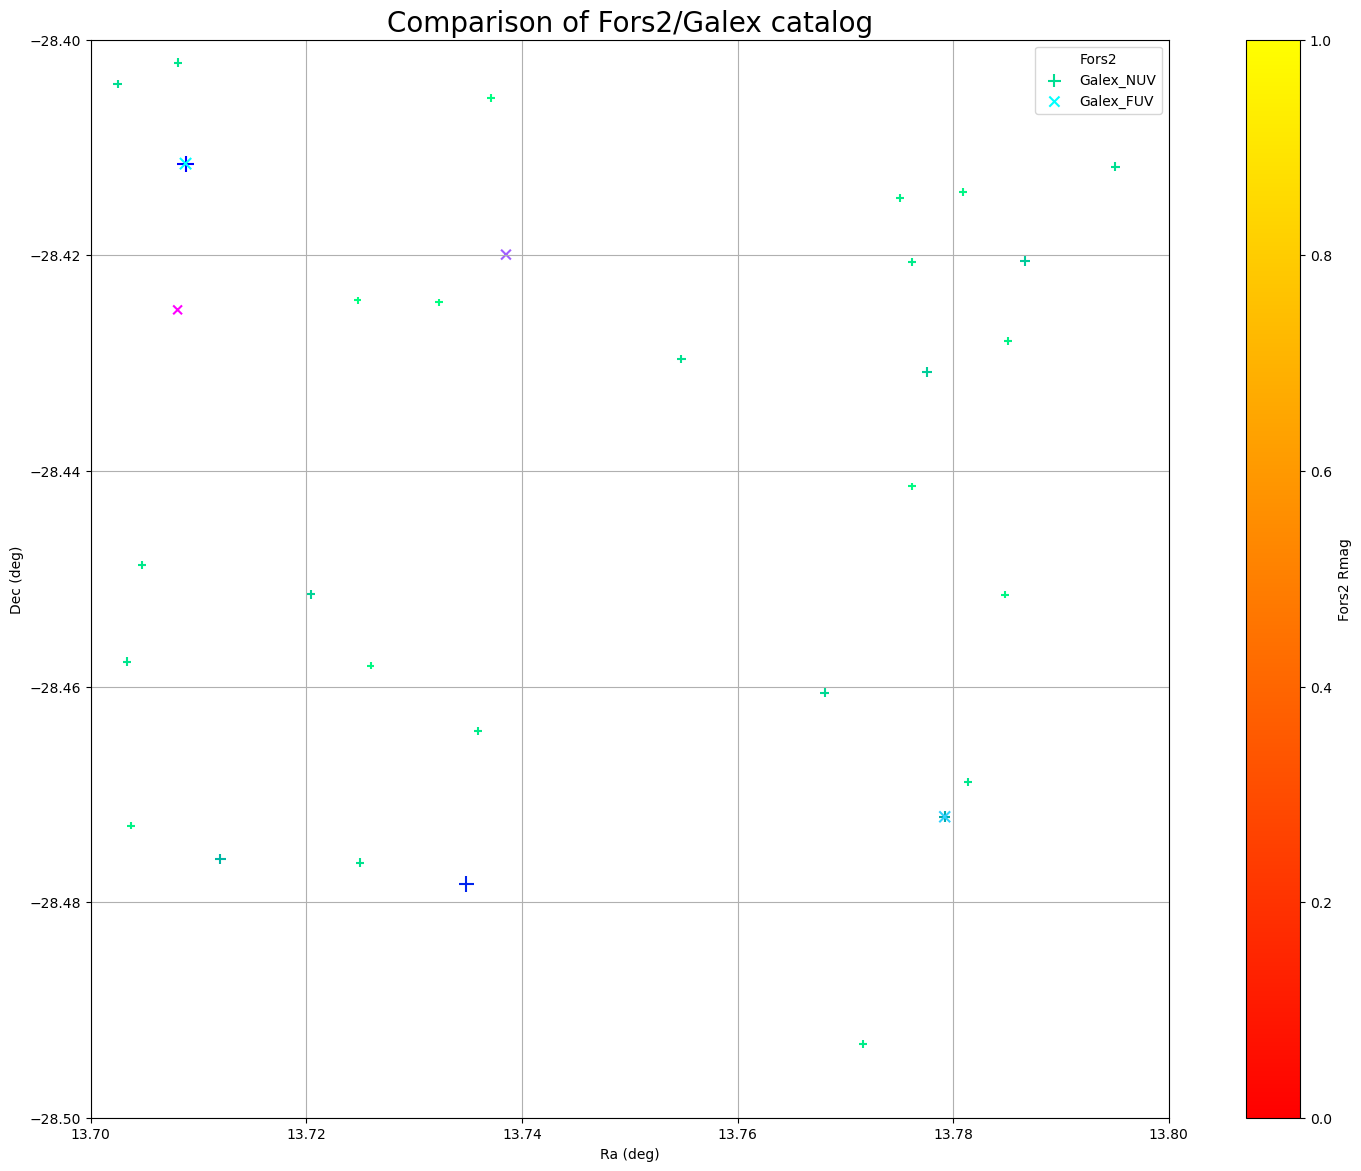

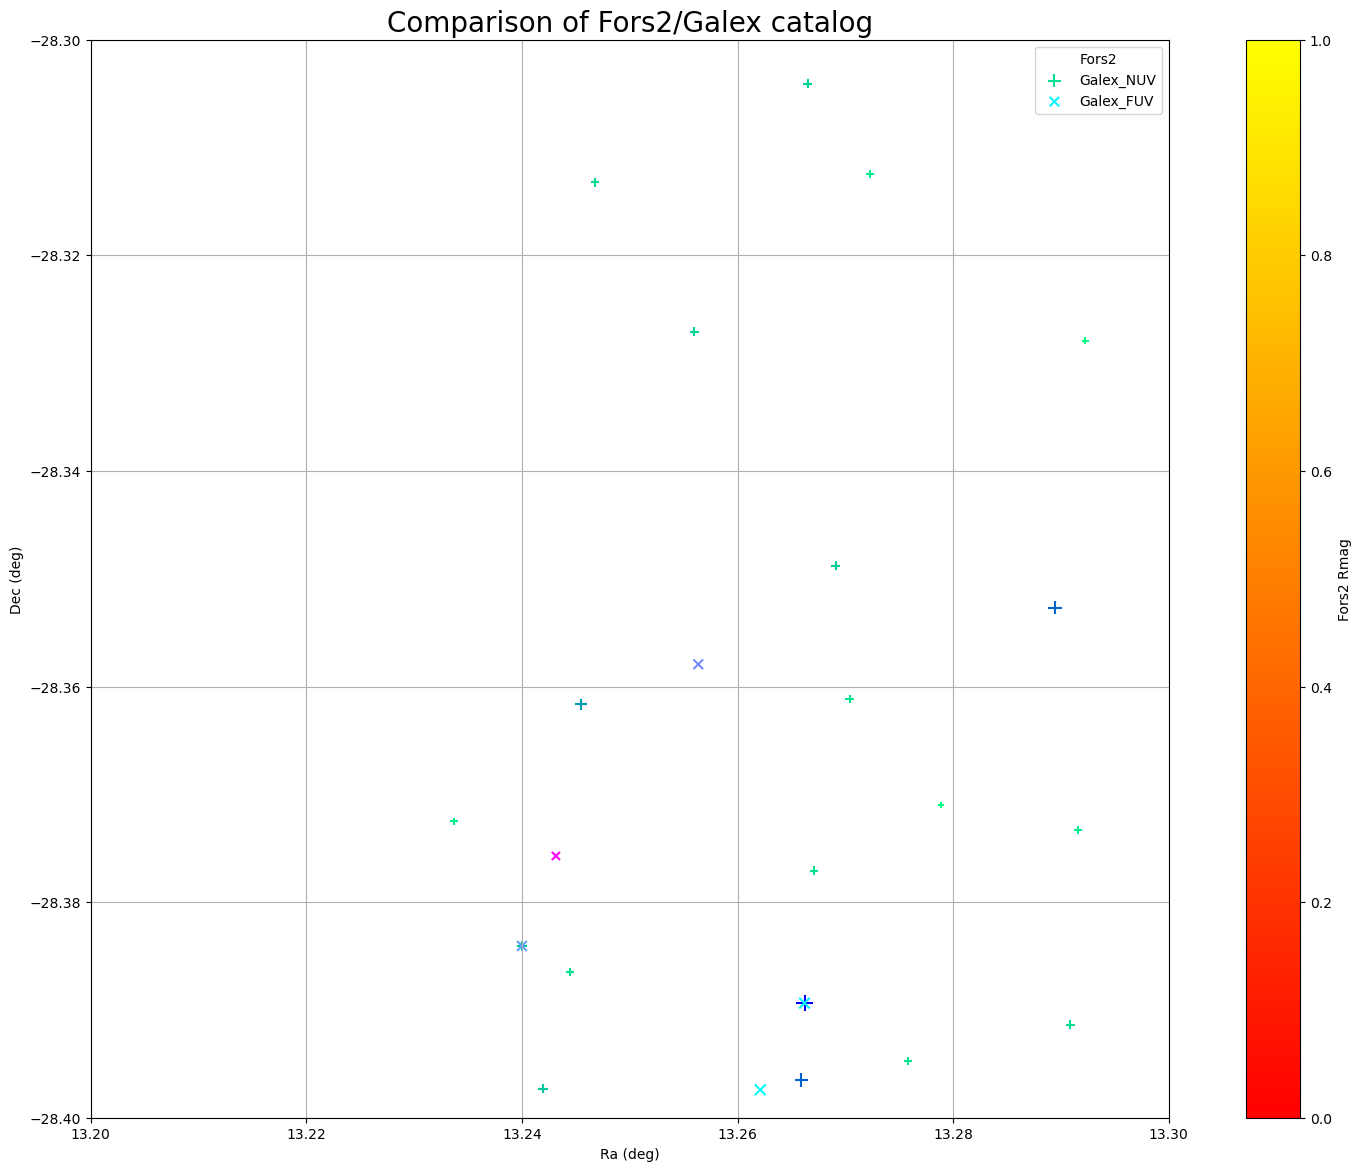

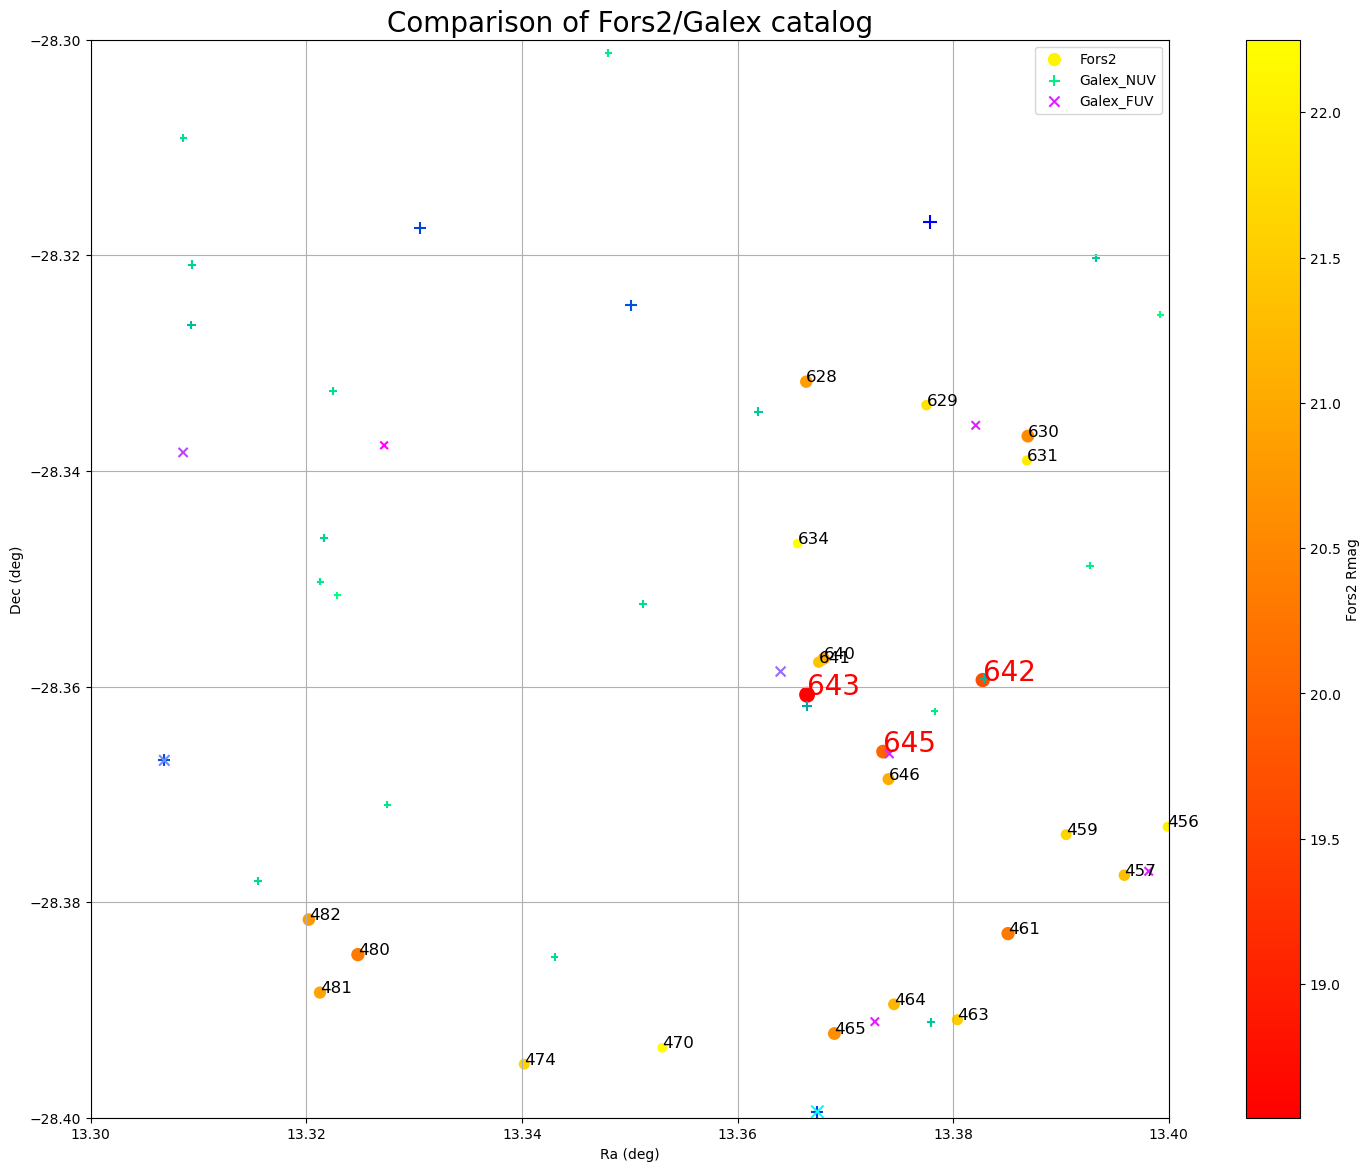

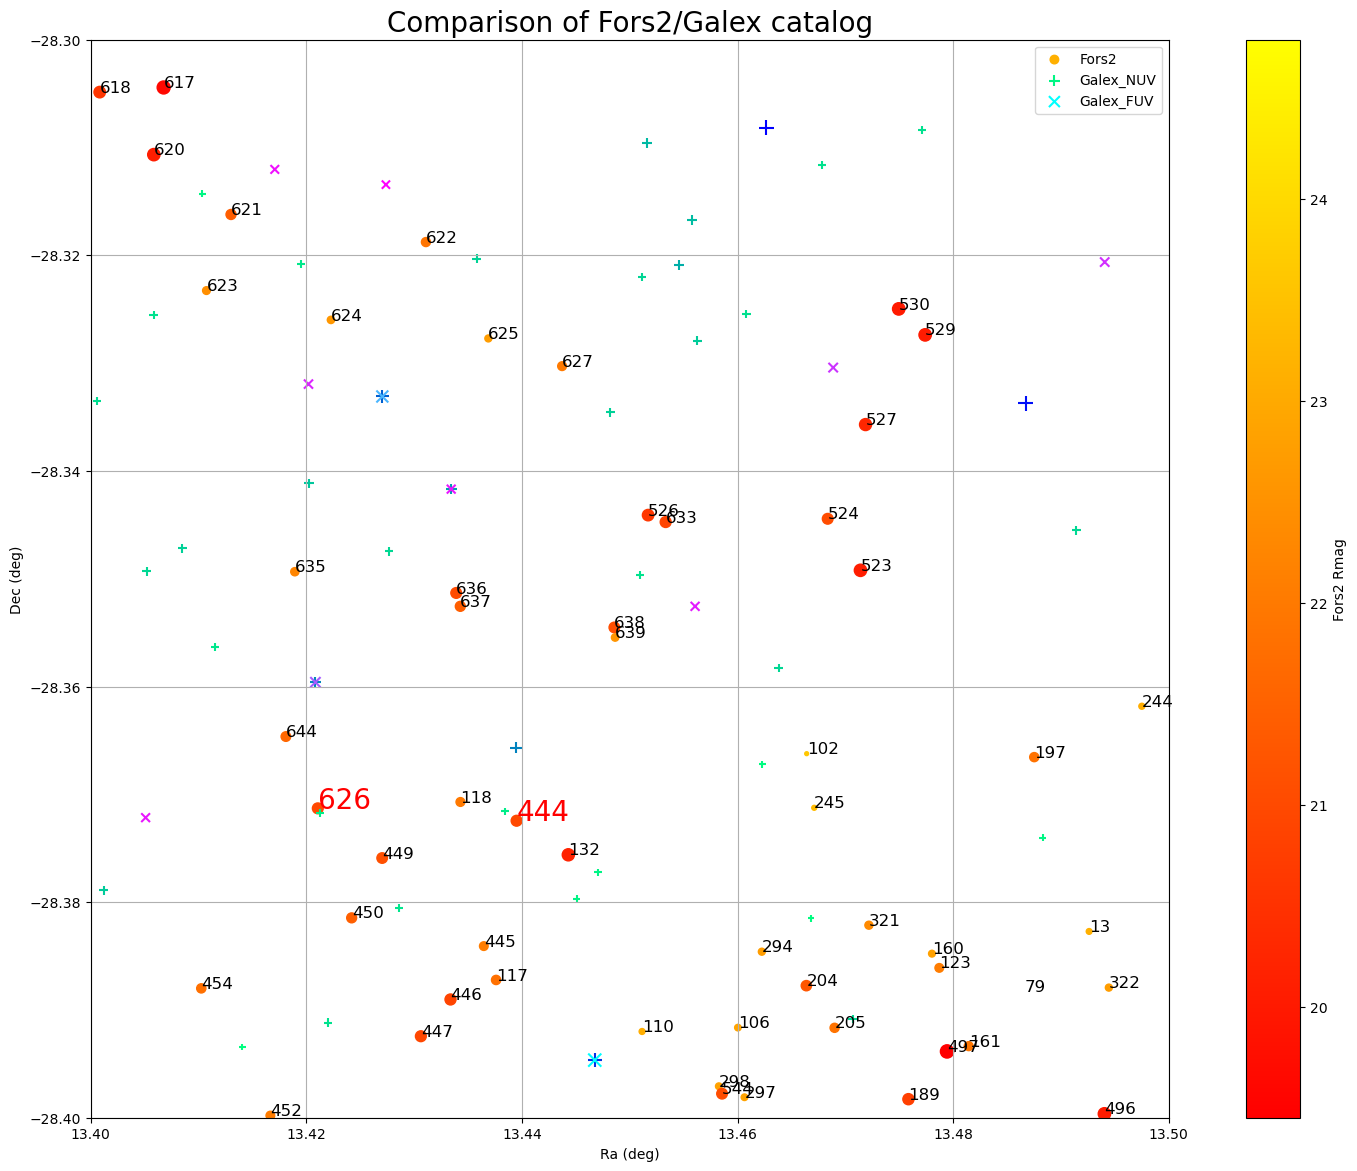

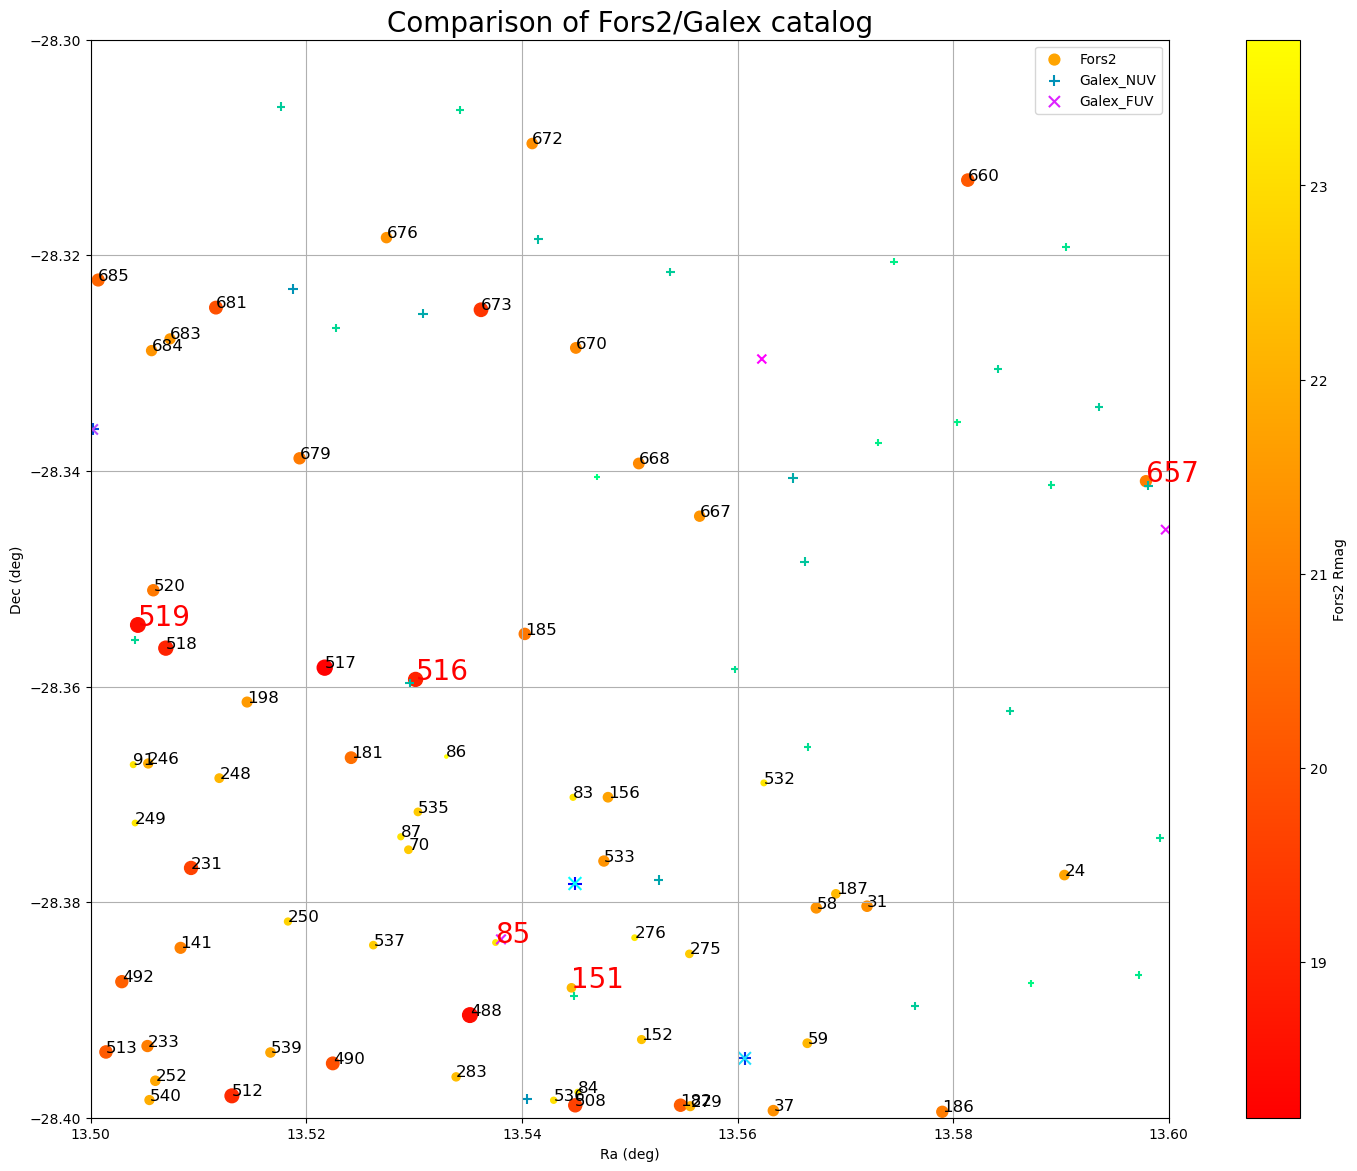

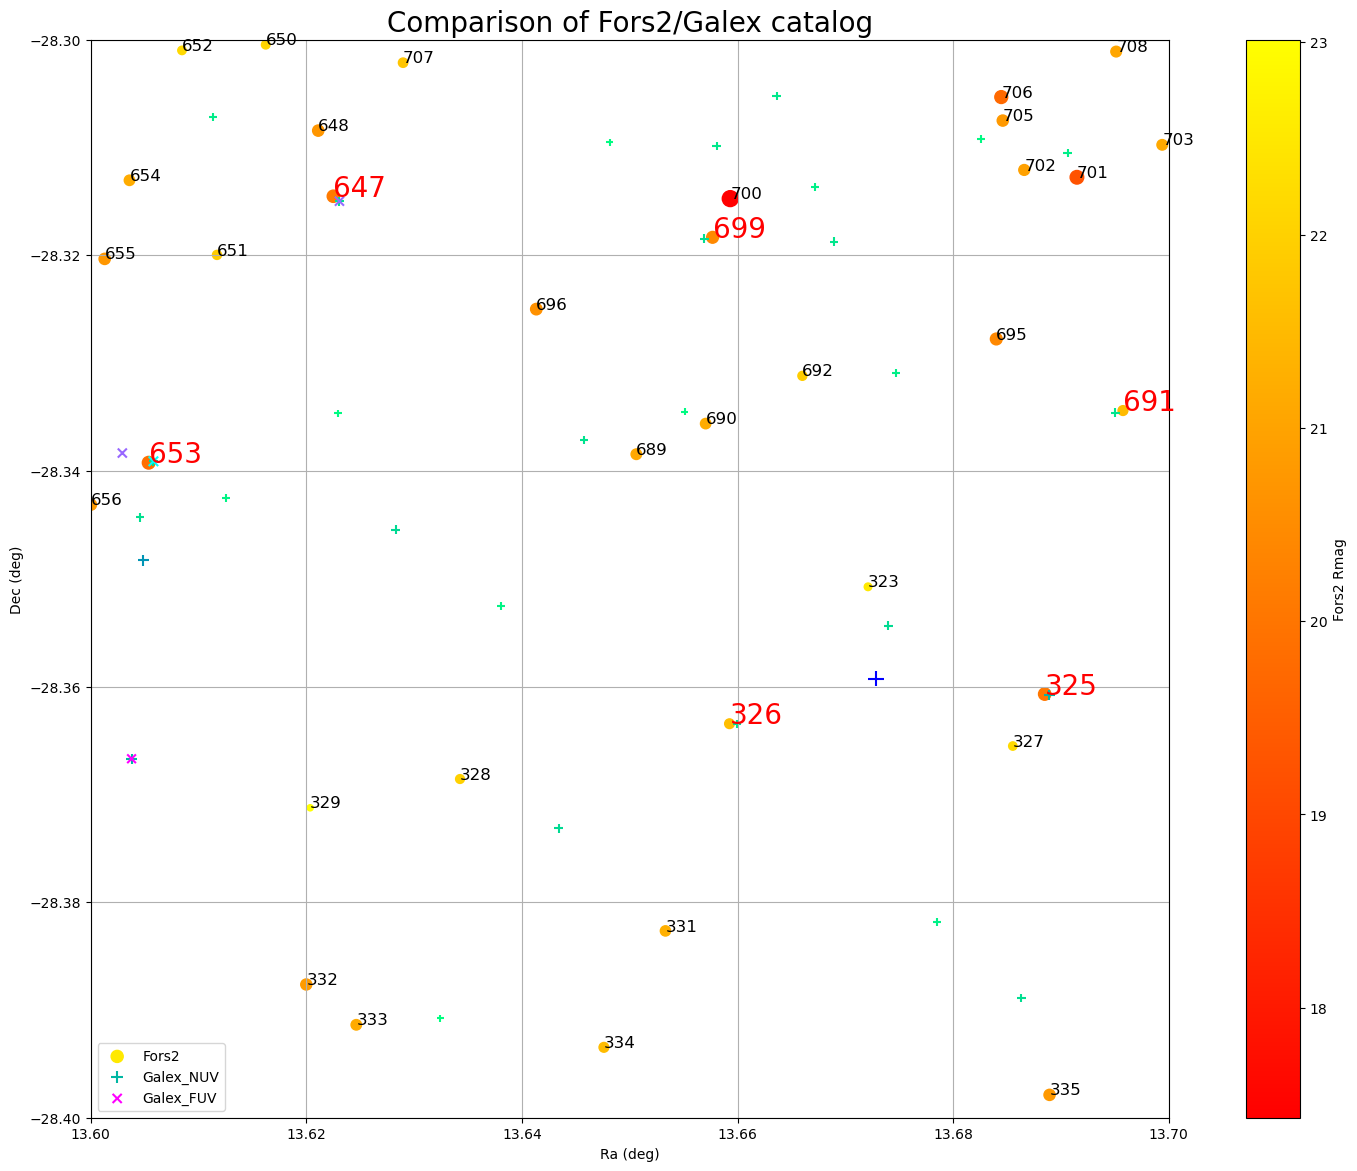

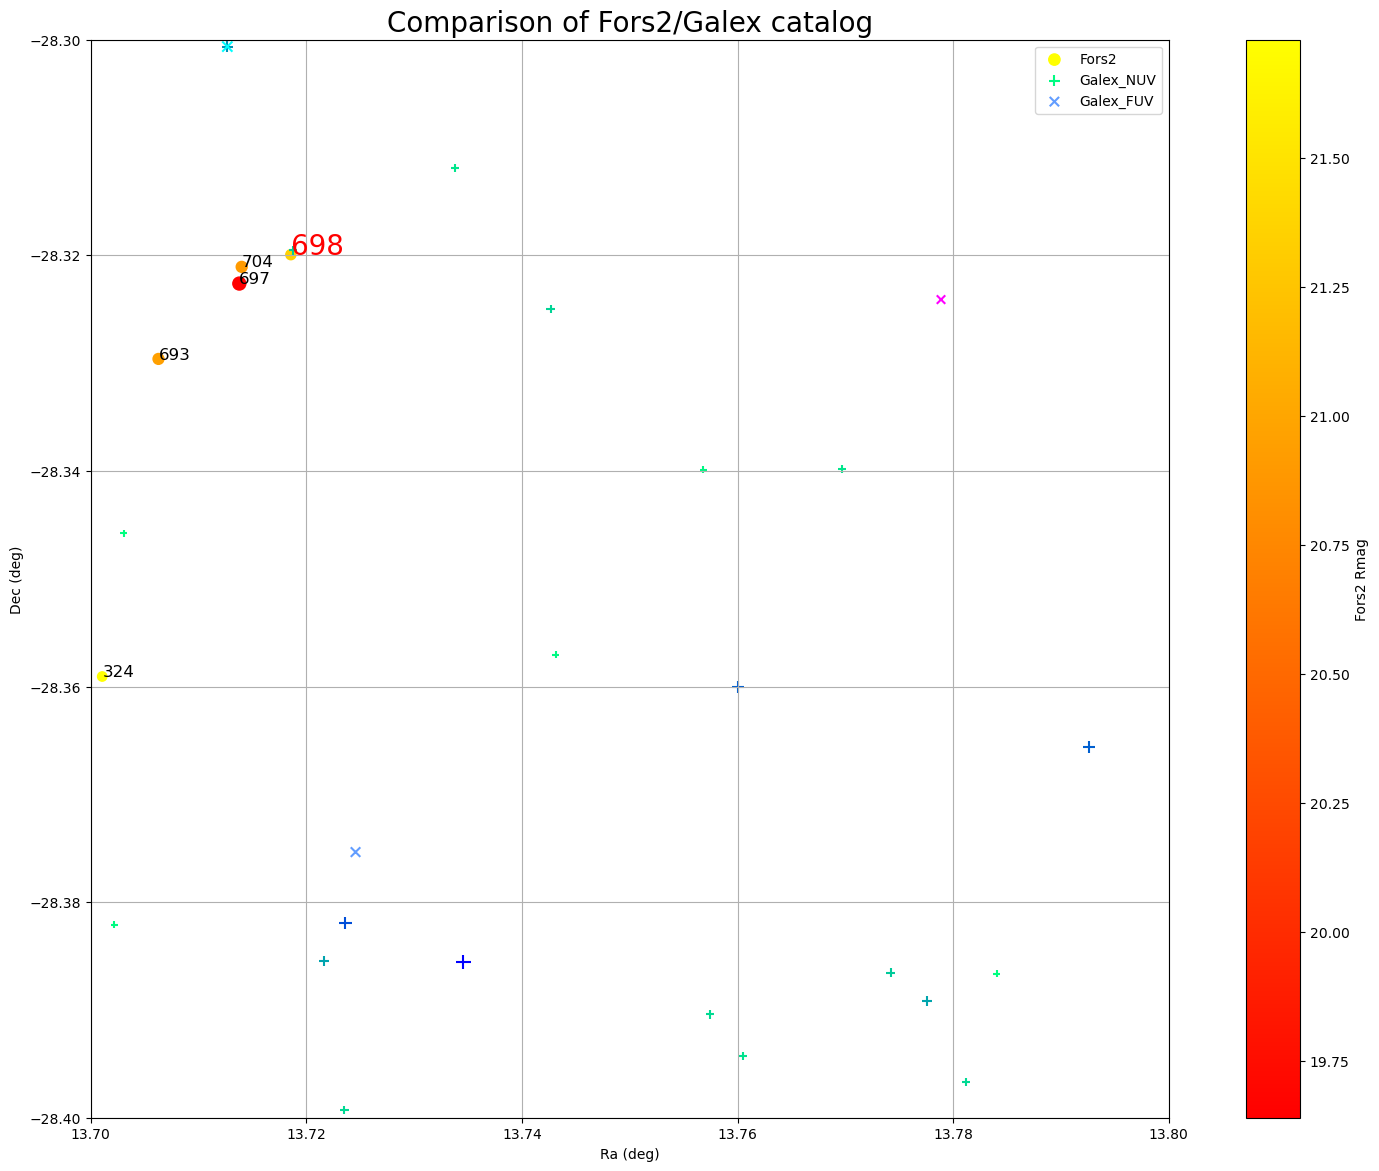

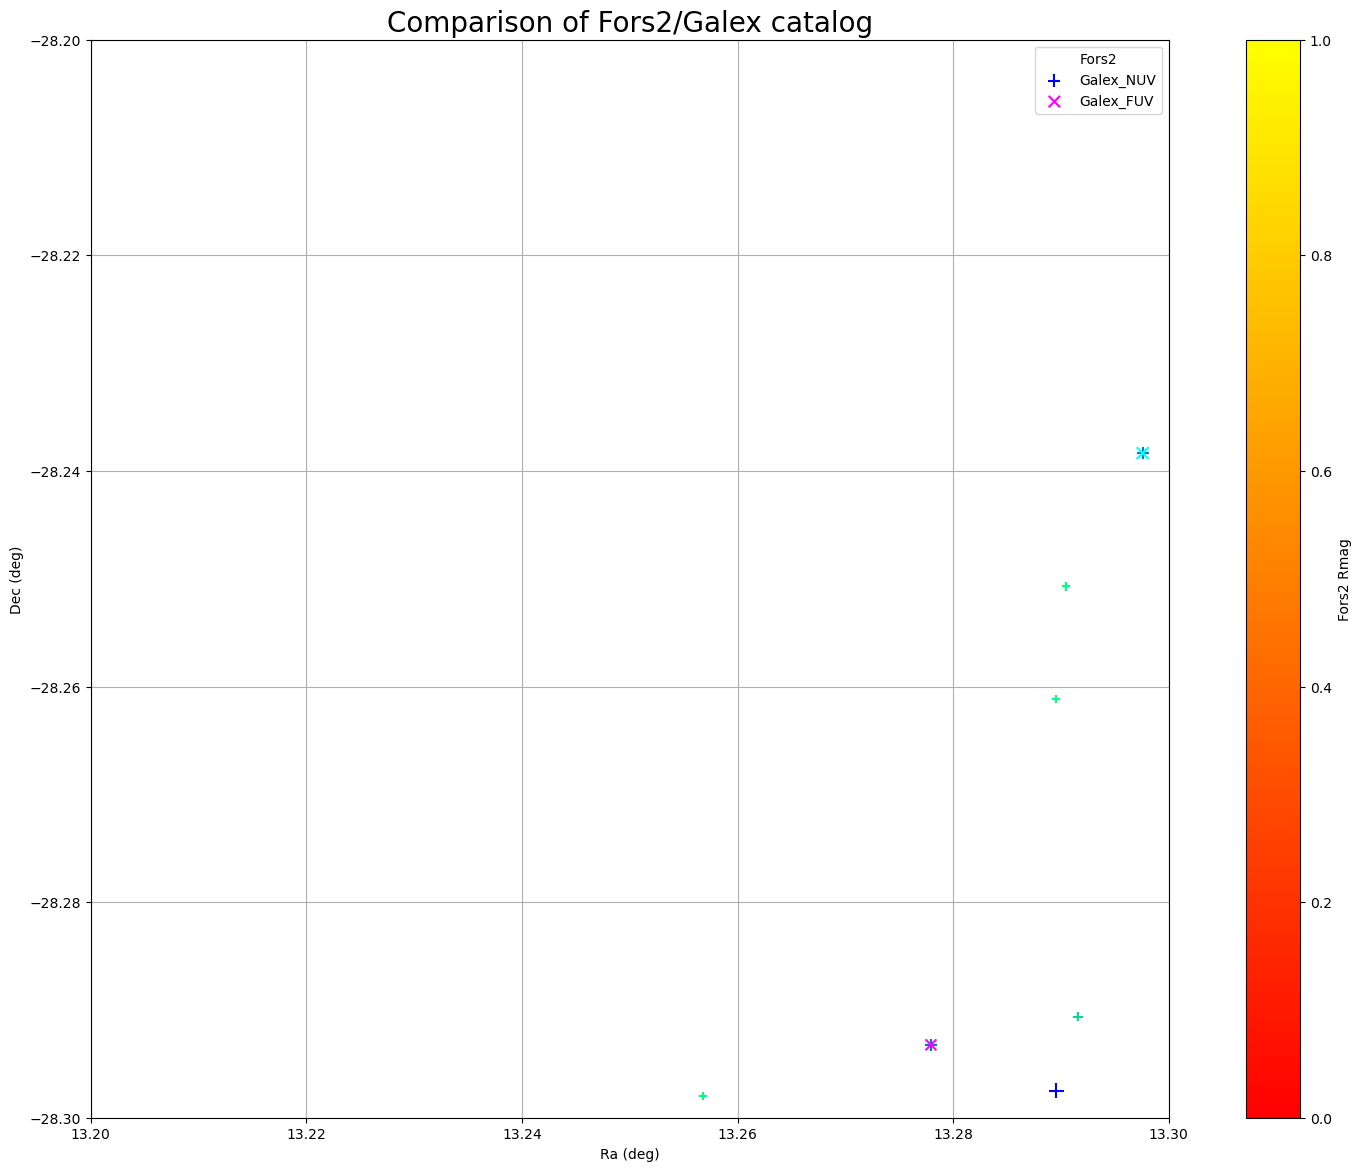

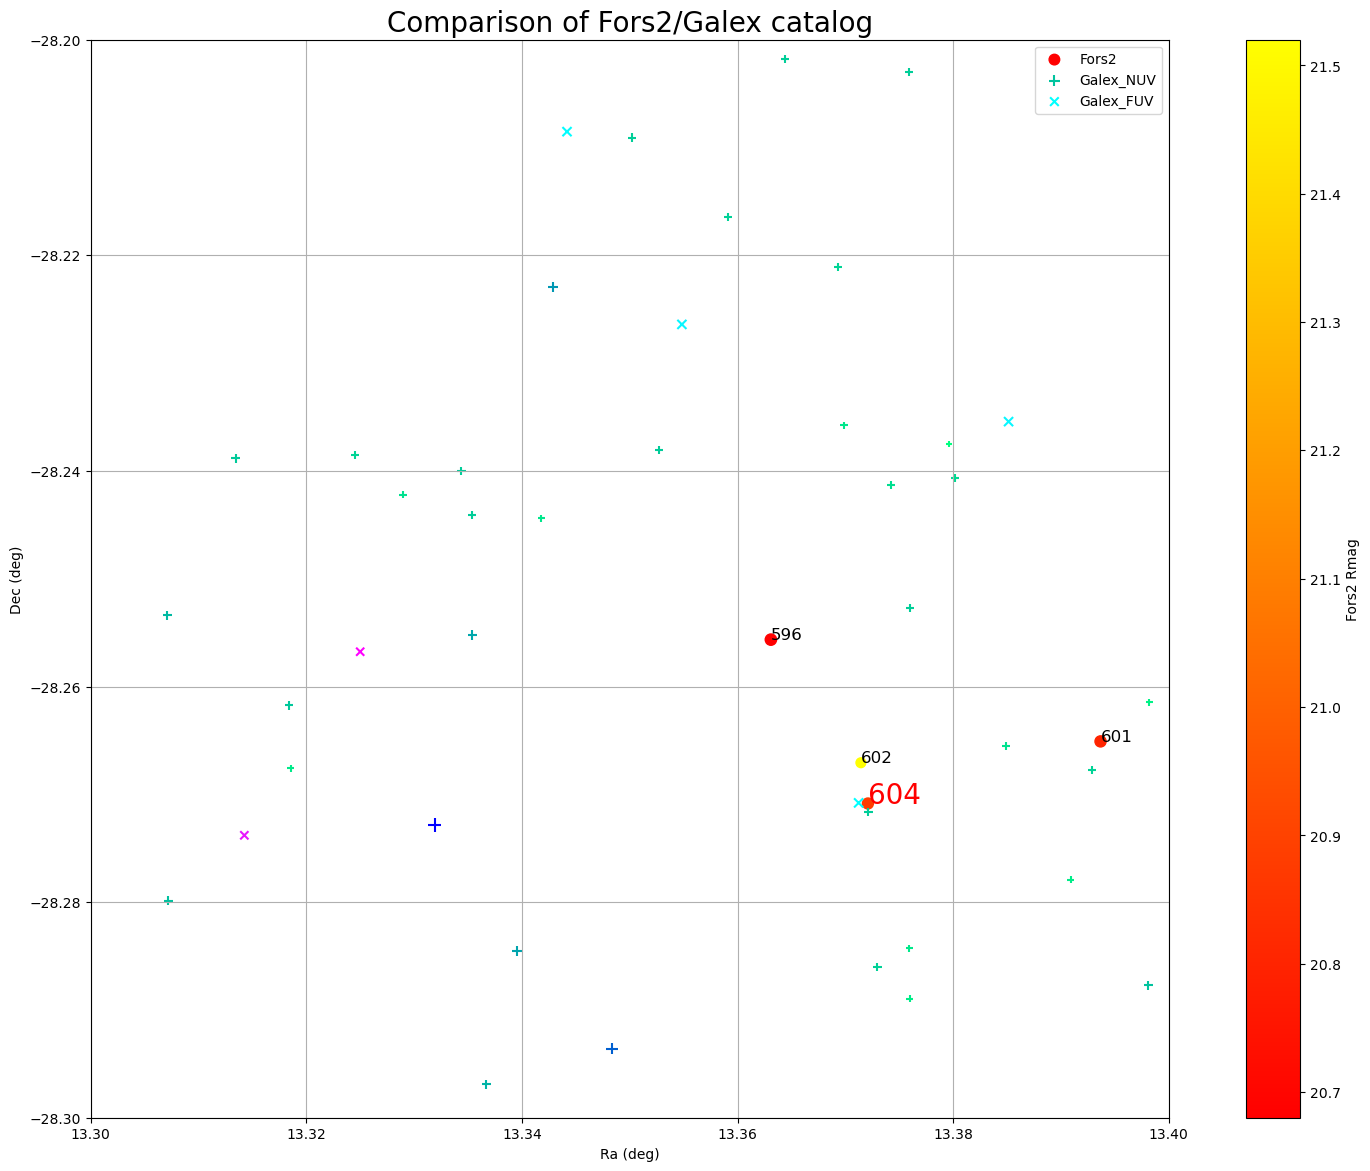

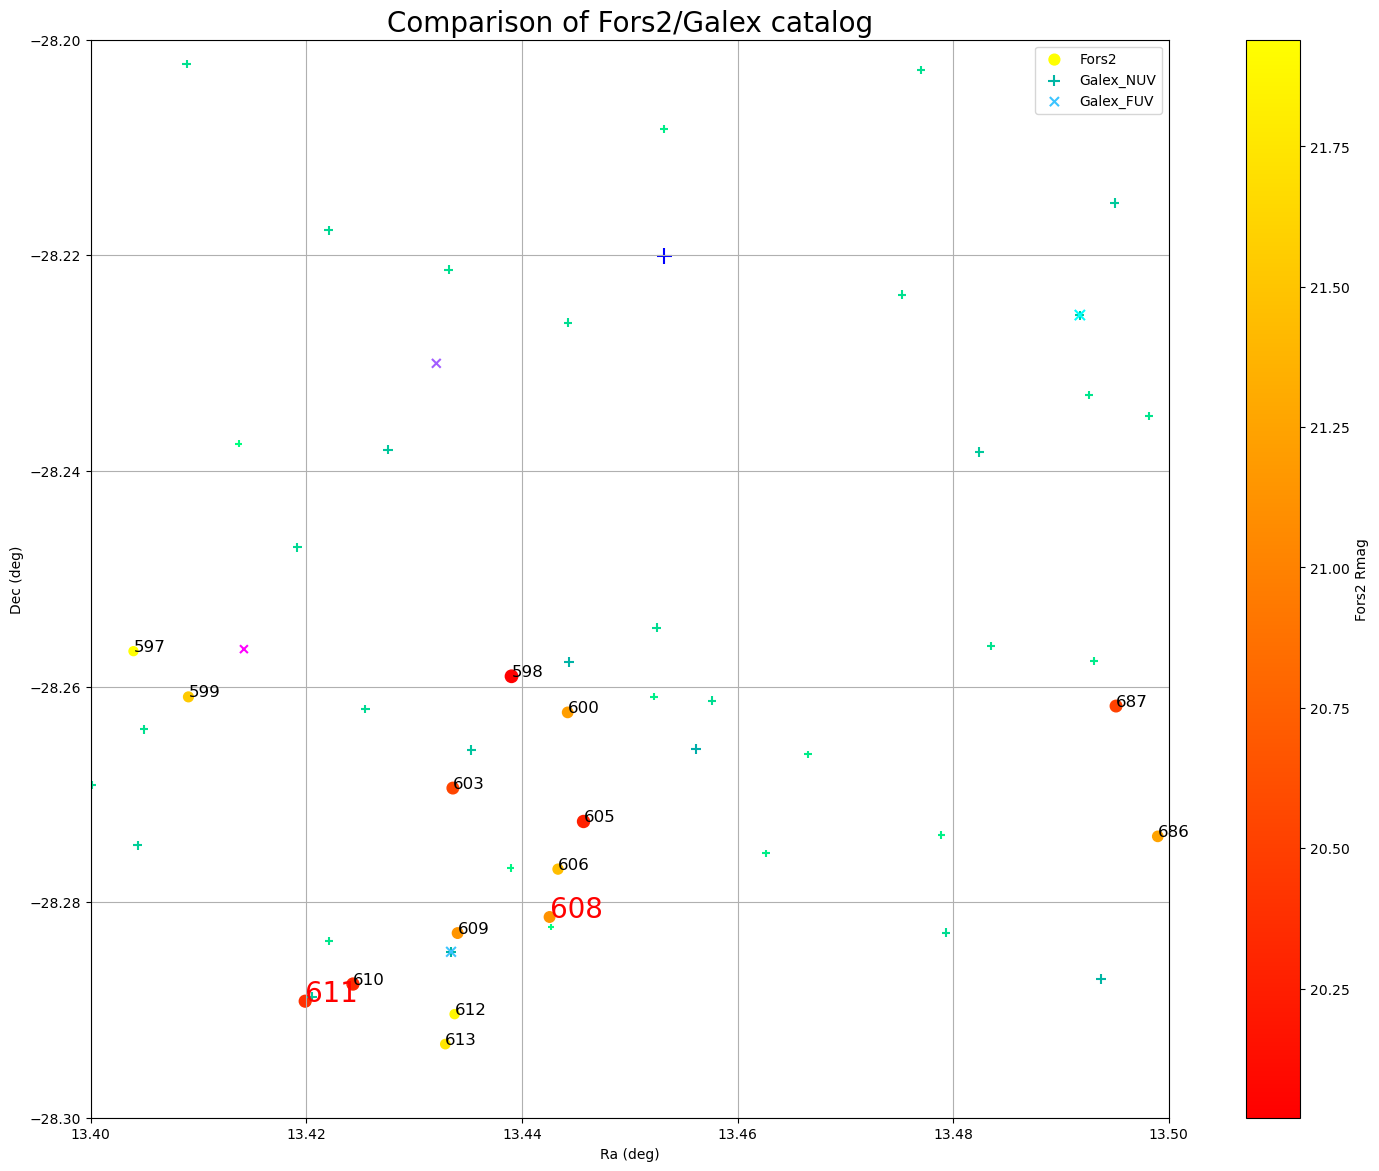

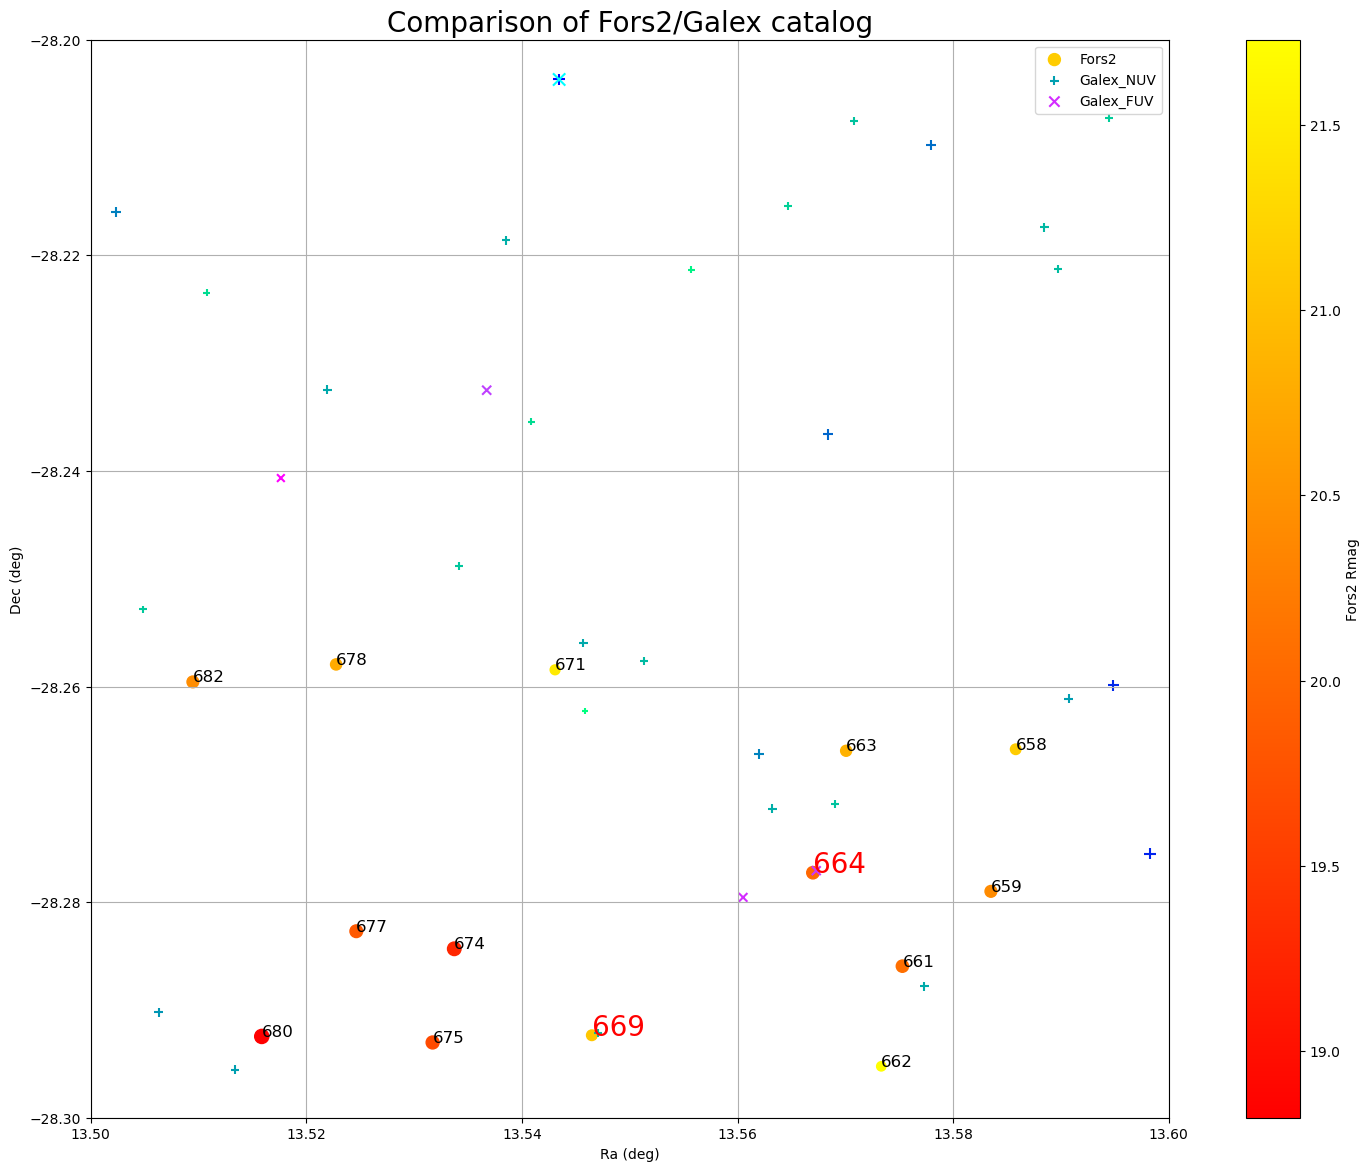

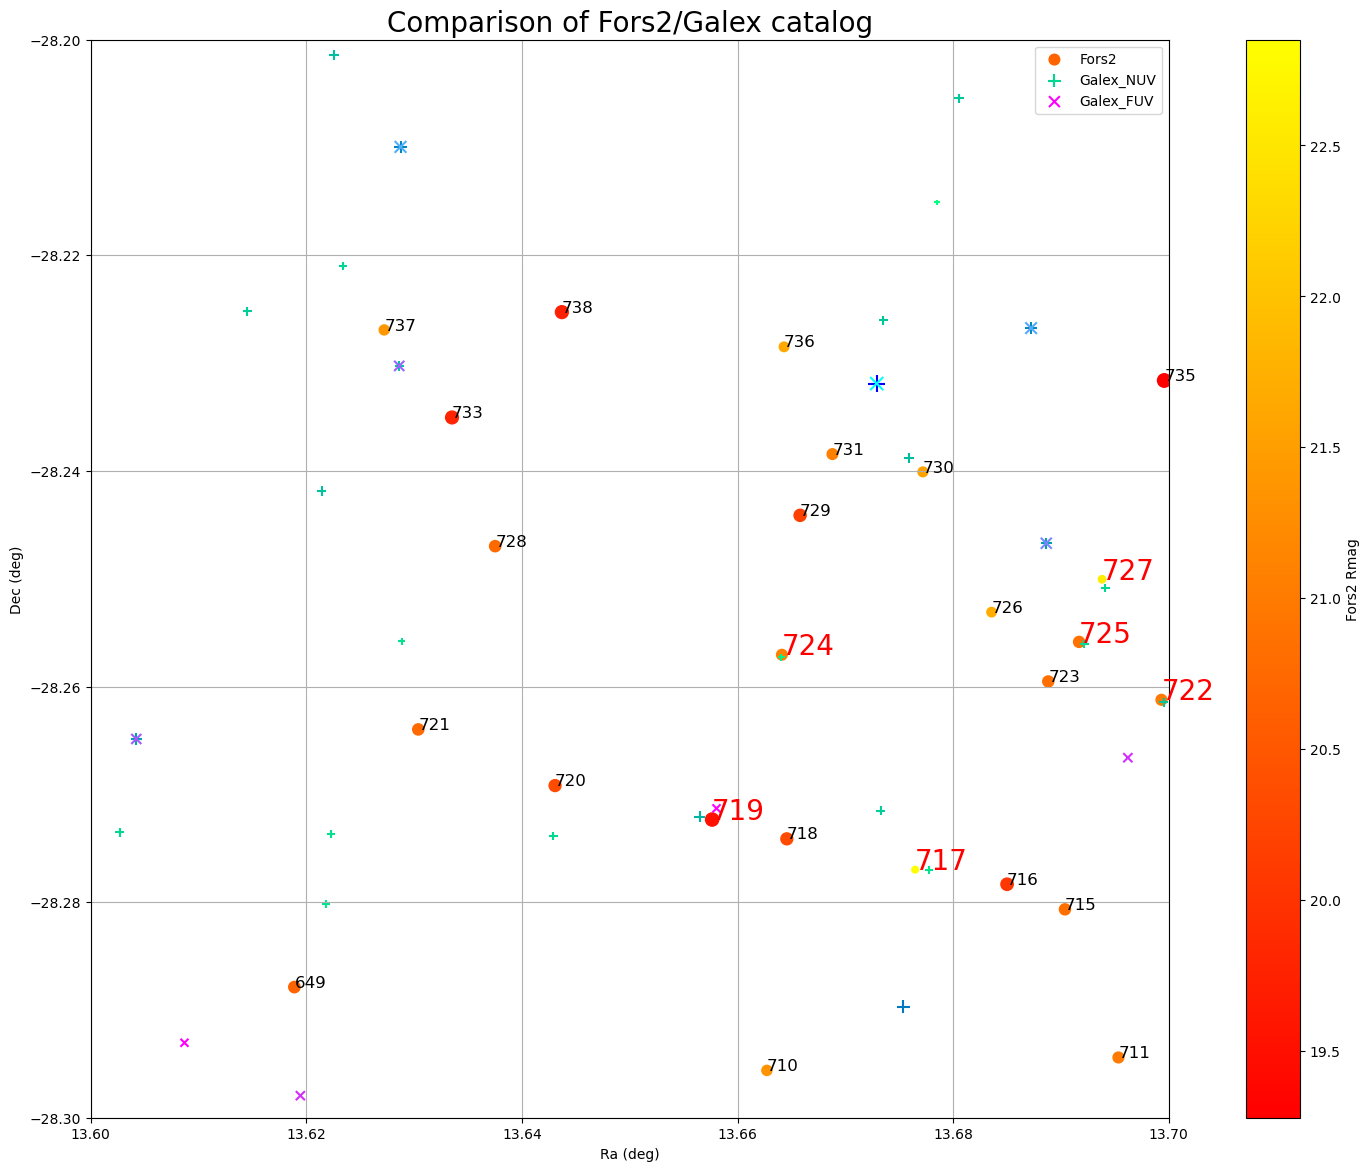

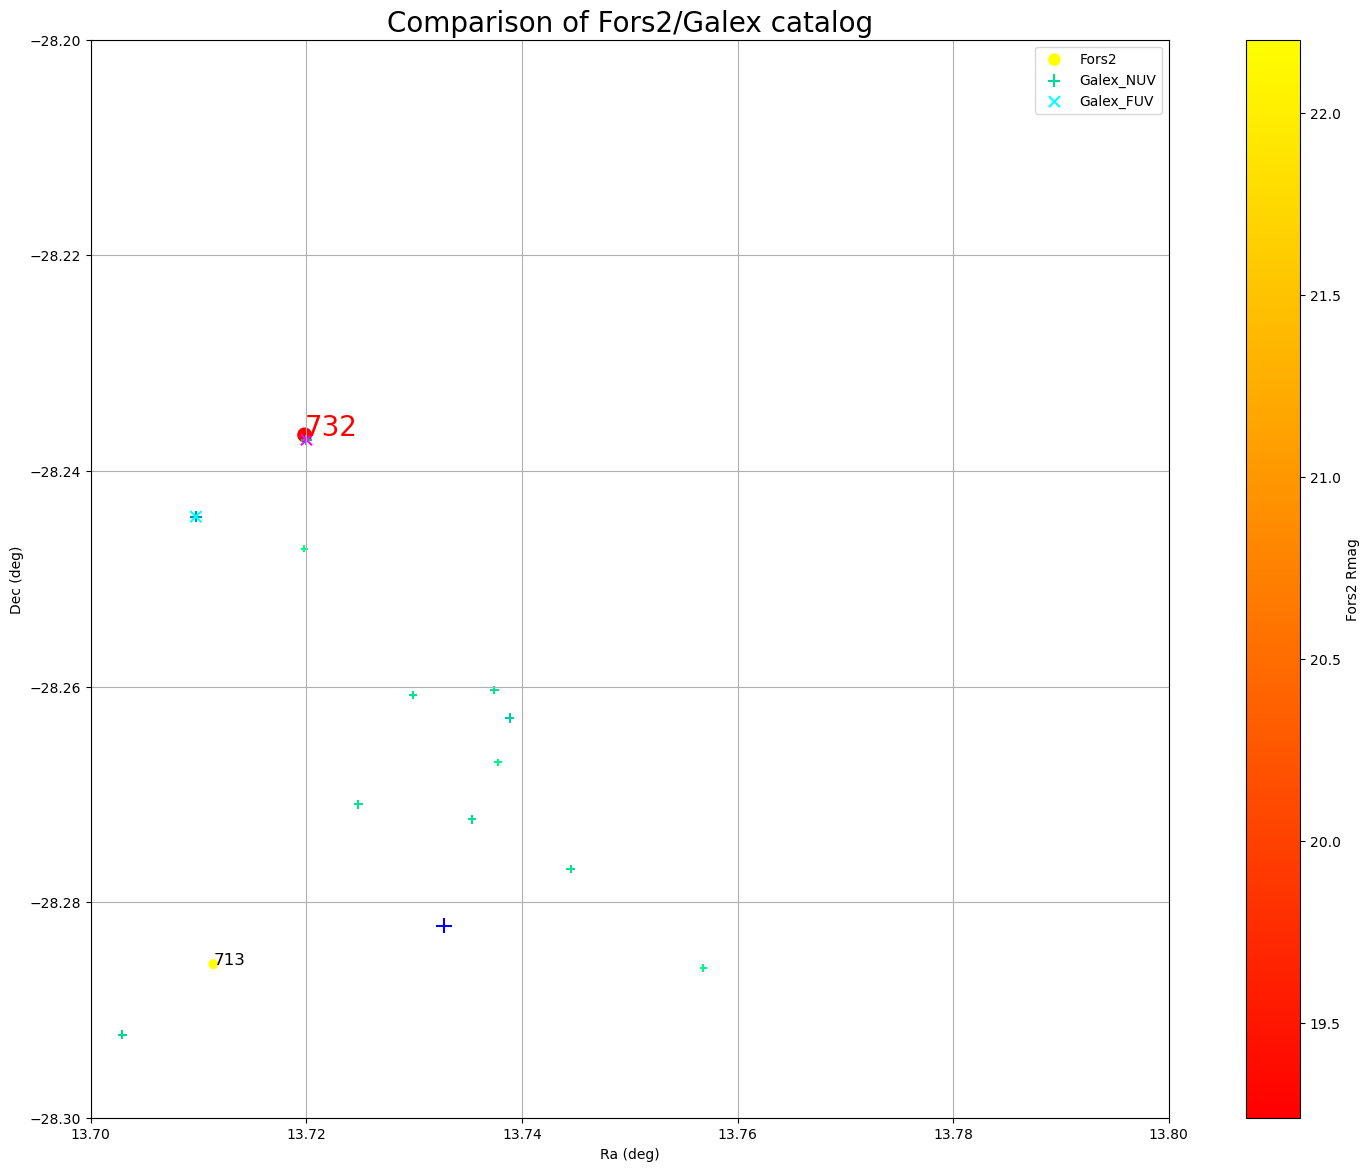

In [60]:
for idx_dec in range(NDEC):
    
    ymin = dec_slices[idx_dec]
    ymax = dec_slices[idx_dec+1]
    
    for idx_ra in range(NRA):
        xmin = ra_slices[idx_ra]
        xmax = ra_slices[idx_ra+1]
        
        # Fors2
        cut_f2 = (df_f2["ra"] >= xmin ) & (df_f2["ra"] <= xmax ) & (df_f2["dec"] >= ymin ) & (df_f2["dec"] <= ymax )
        df1 =  df_f2[cut_f2]
        siz1 =  20*(24 - df1.Rmag)
        
        # Galex NUV
        cut_gan = (df_gnuv["ra_galex"] >= xmin ) & (df_gnuv["ra_galex"] <= xmax ) & (df_gnuv["dec_galex"] >= ymin ) & (df_gnuv["dec_galex"] <= ymax )
        df2 =  df_gnuv[cut_gan]
        siz2 =  20*(24 - df2.nuv_mag)
        
        # GalexFUV
        cut_gaf = (df_gfuv["ra_galex"] >= xmin ) & (df_gfuv["ra_galex"] <= xmax ) & (df_gfuv["dec_galex"] >= ymin ) & (df_gfuv["dec_galex"] <= ymax )
        df3 =  df_gfuv[cut_gaf]
        siz3 =  20*(24 - df3.fuv_mag)
        
        
        # plot patch of sky
     
        fig =plt.figure(figsize=(20,14))
        ax=fig.add_subplot(111)
        im = ax.scatter(df1.ra, df1.dec,c=df1.Rmag,cmap="autumn",s=siz1,label="Fors2")
        im2 = ax.scatter(df2["ra_galex"], df2["dec_galex"],marker="+",c=df2['nuv_mag'],cmap="winter",s=siz2,label="Galex_NUV")
        im3 = ax.scatter(df3["ra_galex"], df3["dec_galex"],marker="x",c=df3['fuv_mag'],cmap="cool",s=siz3,label="Galex_FUV")
        
        for idx,row in df1.iterrows():
            x = row["ra"]
            y = row["dec"]
            num = int(row["num"])
            dy = 0
            dx = 0
            
            
            if num in df_info_selected.num.values:
                ax.text(x+dx,y+dy,str(num),fontsize=20,color="r")
            else:
                ax.text(x+dx,y+dy,str(num),fontsize=12)
        
        

        cbar = plt.colorbar(im)
        cbar.set_label('Fors2 Rmag')

        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)
        ax.grid()
        ax.legend()
        ax.set_xlabel("Ra (deg)")
        ax.set_ylabel("Dec (deg)")
        ax.set_title("Comparison of Fors2/Galex catalog",fontsize=20)
        plt.gca().set_aspect('equal')
    
        plt.show()
      
    